In [1]:
import os, sys

import numpy as np
import pandas as pd
import time, random, math
import copy, gc
from collections import deque
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn
import torch
from torch.optim import Adam
from torch.distributions import Categorical

In [2]:
from method_1 import SearchAvailablePosition
from method_2 import SearchAction
from method_3 import ChangeBoard

from Othello import Othello

In [3]:
from RL.train_model import get_play_data, getState
from RL.rule_agent import randomAgent, greedyAgent, RollOutAgent
from RL.optimize_model import optimize_a2cmodel as optimize_model
from RL.A2C_agent import agent as a2c_agent
from RL.DQN_agent import agent as dqn_agent
from RL.Replay_Memory import Replay_Memory
from RL.noise import AdaptiveParamNoiseSpec
from RL.utils import get_device

In [4]:
agent_1 = a2c_agent(
    input_dim=3, lam=0.6, gamma=.9, lr=1e-4,
)
agent_1.model.load_state_dict(torch.load("a2c_2_param1.pt"))

agent_2 = a2c_agent(
    input_dim=3, lam=0.6, gamma=.9, lr=1e-4,
)
agent_2.model.load_state_dict(torch.load("a2c_2_param2.pt"))

<All keys matched successfully>

In [5]:
data_1, data_2 = get_play_data(agent_1, randomAgent())

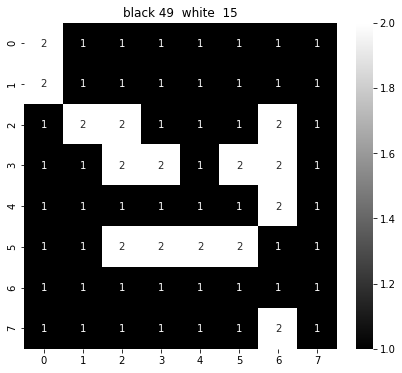

In [6]:
v_1 = data_1['states'][0][0]
v_2 = data_1['states'][0][1]
plt.figure(figsize=(7,6))
sns.heatmap(data_1['states'][0][0]+2*data_1['states'][0][1], cmap='gray', annot=True)
plt.title(f"black {len(v_1[v_1==1])}  white  {len(v_2[v_2==1])}")
plt.show()

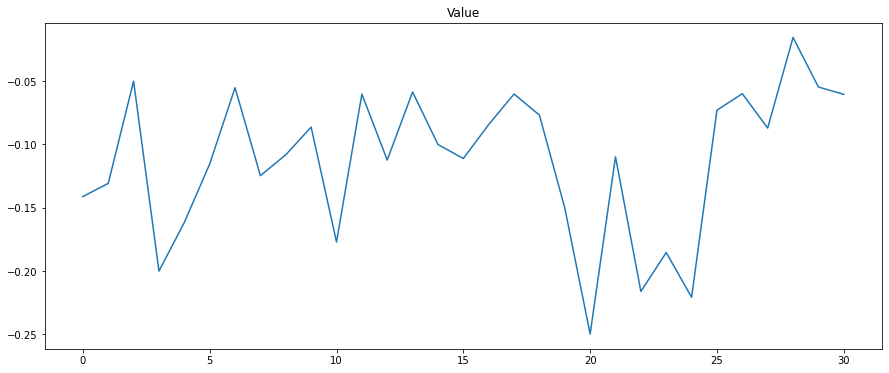

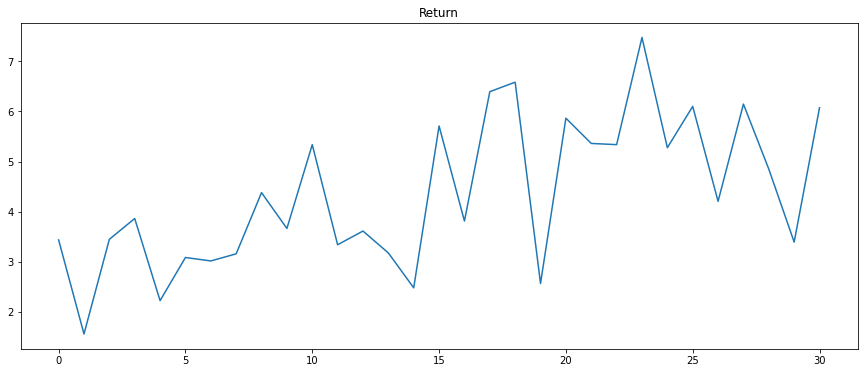

In [7]:
s = data_2['states']
out = agent_2.model(s)
policy = out["policy"].detach().numpy()[1:]
values = out["value"].detach().numpy()[1:]
returns = out["return"].detach().numpy()[1:]
attention = out["attention"].detach().numpy()[1:]

s = s[1:]
s_2 = s[:,2,:,:].flatten(1).detach().numpy()
policy[s_2==0]=-1e10

values = values.flatten()
returns = returns.flatten()

plt.figure(figsize=(15,6))
plt.plot(out["value"].detach().numpy()[::-1])
plt.title('Value')
plt.show()

plt.figure(figsize=(15,6))
plt.plot(out["return"].detach().numpy()[::-1])
plt.title('Return')
plt.show()

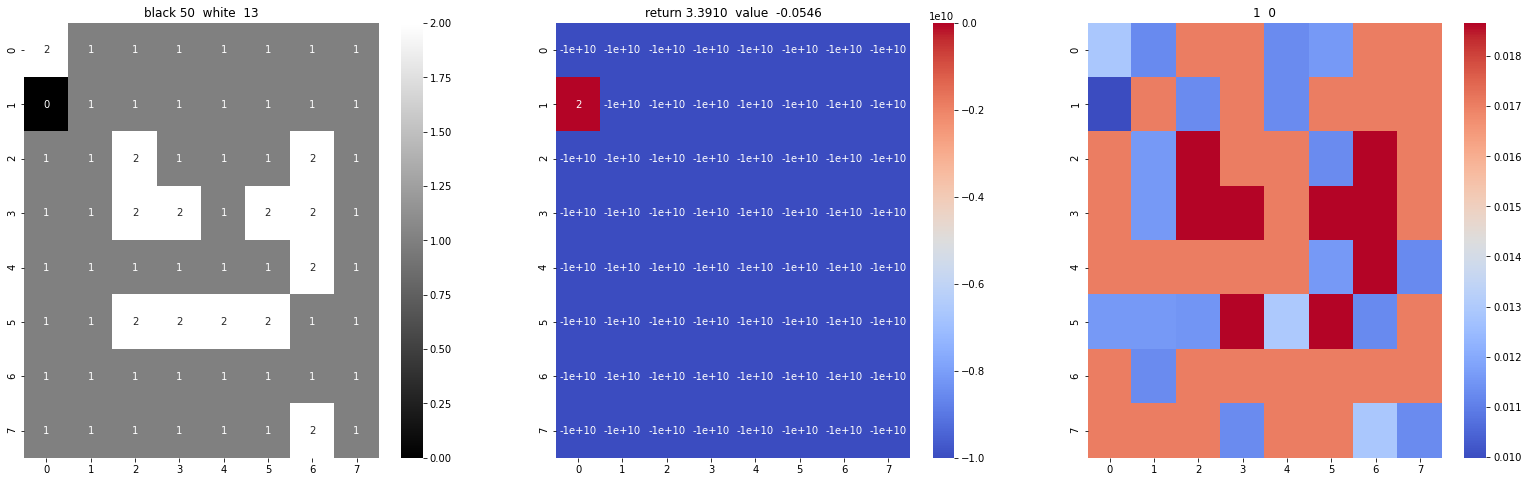

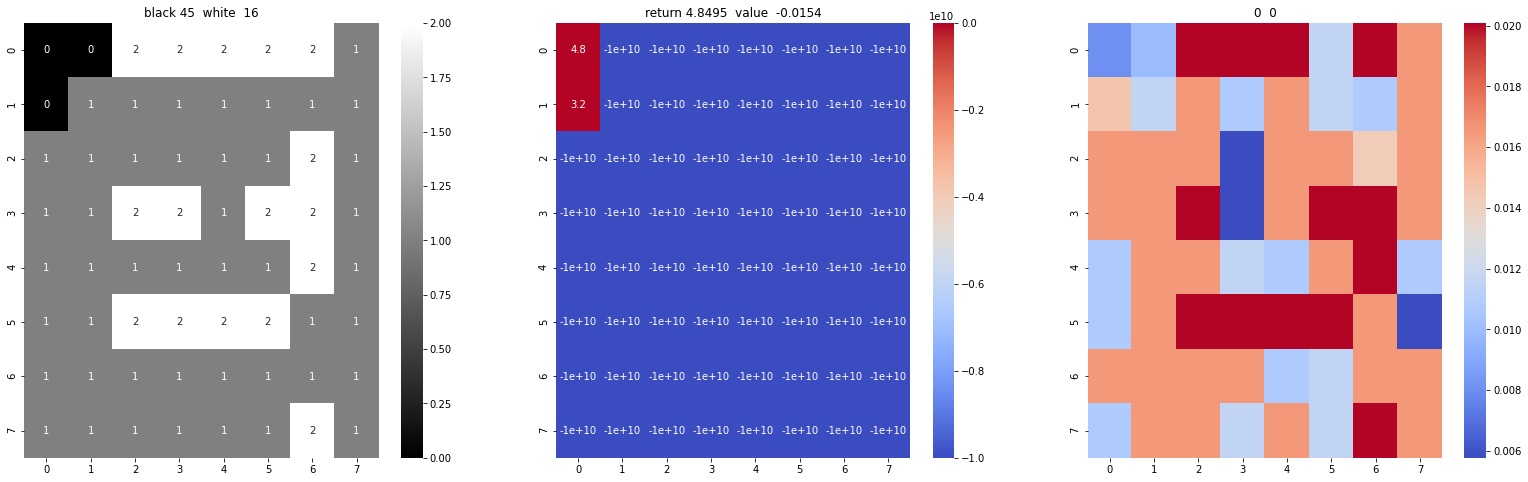

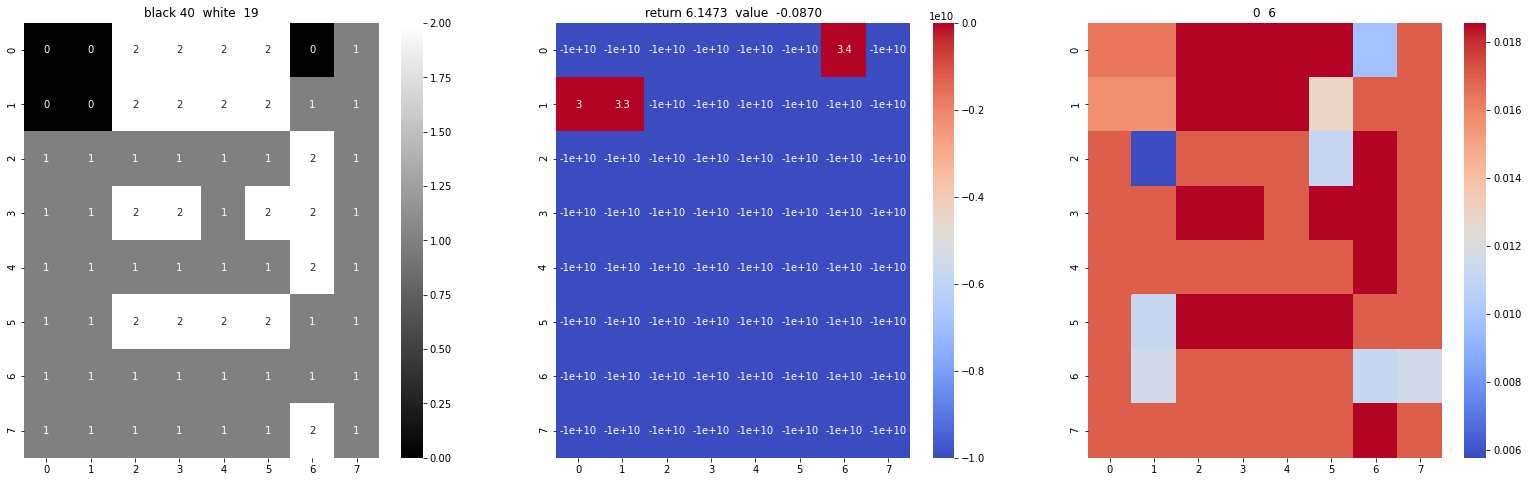

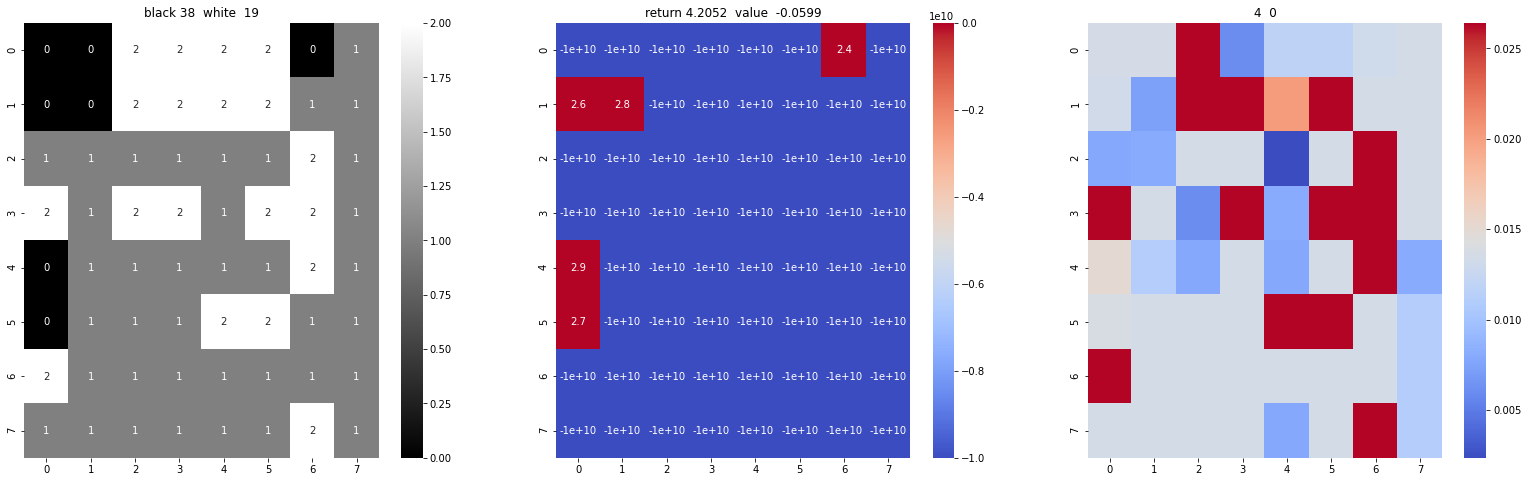

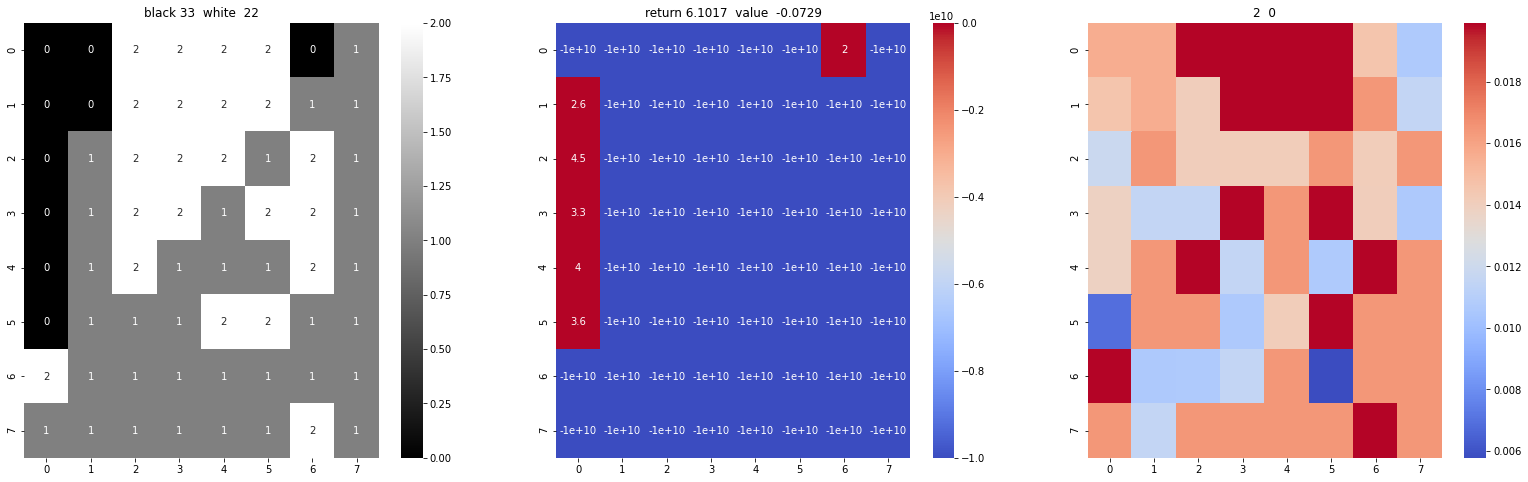

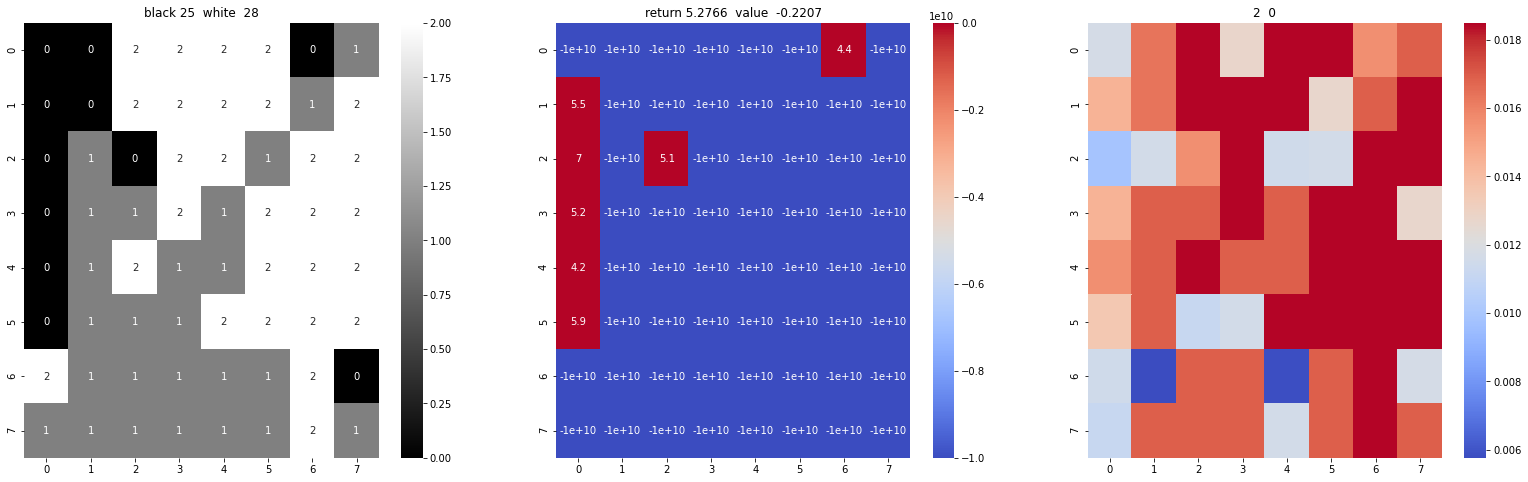

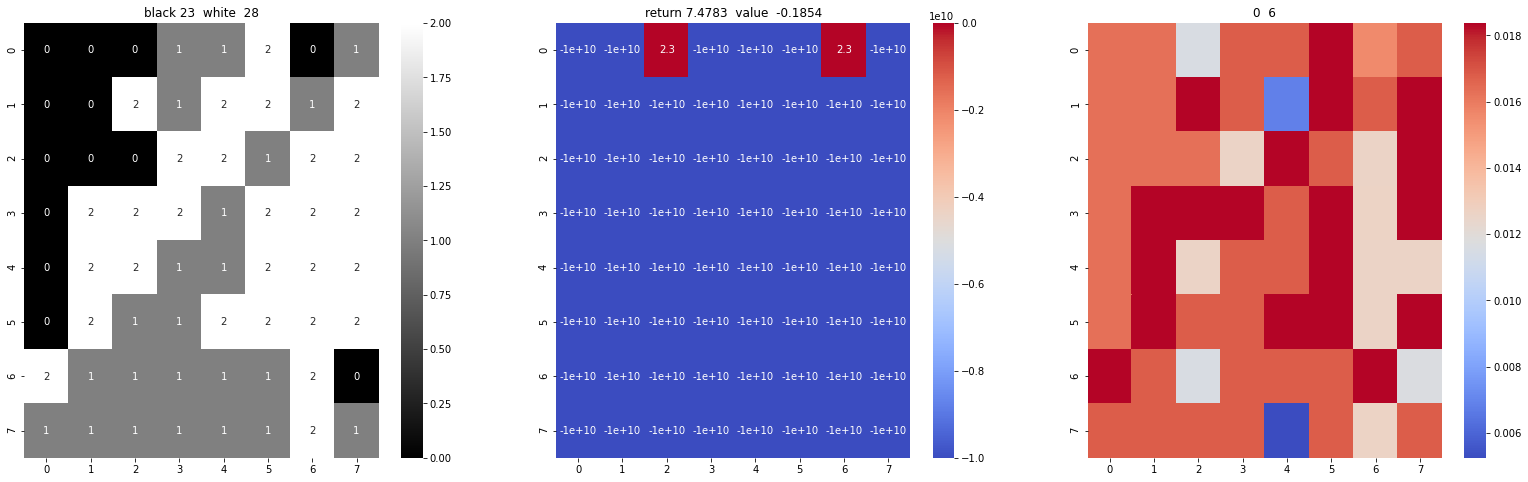

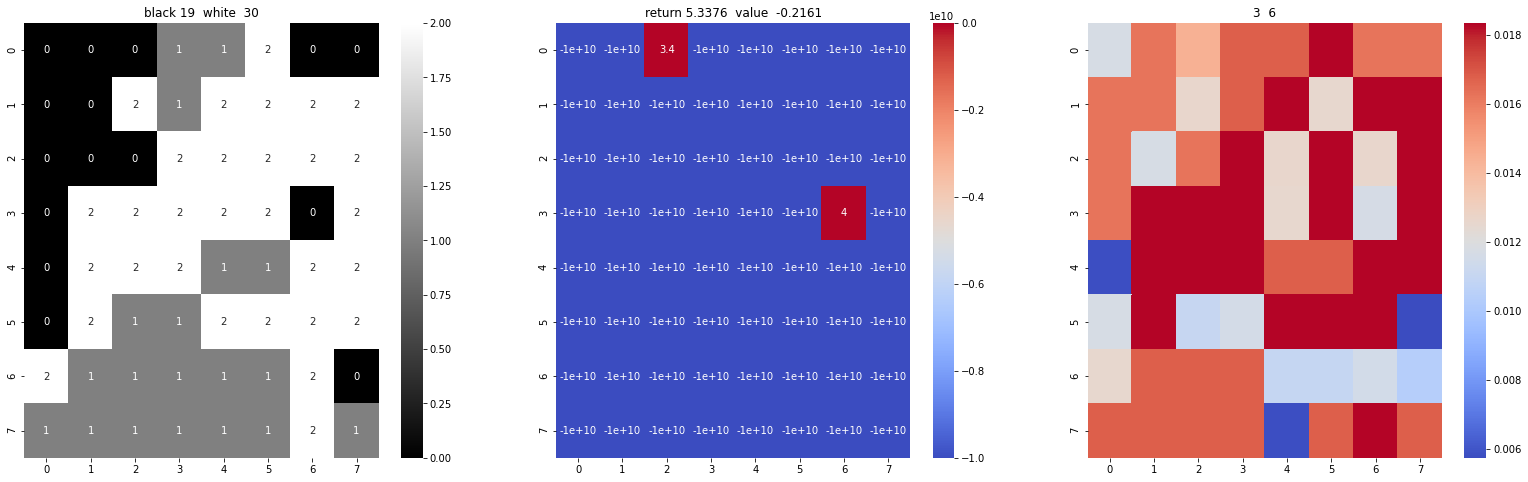

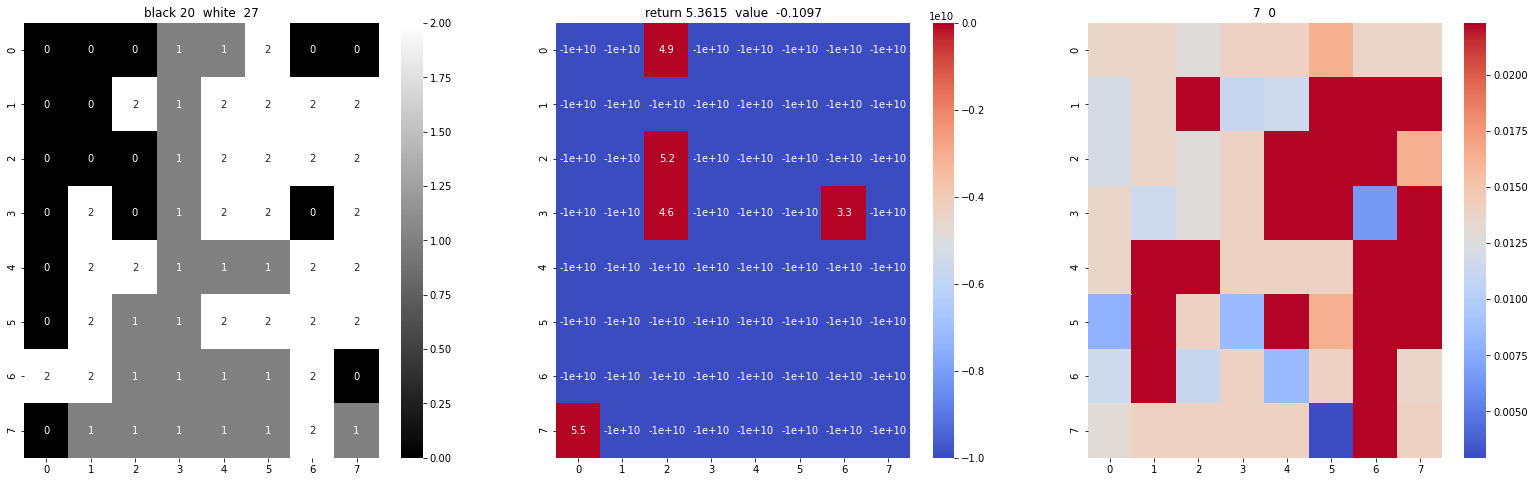

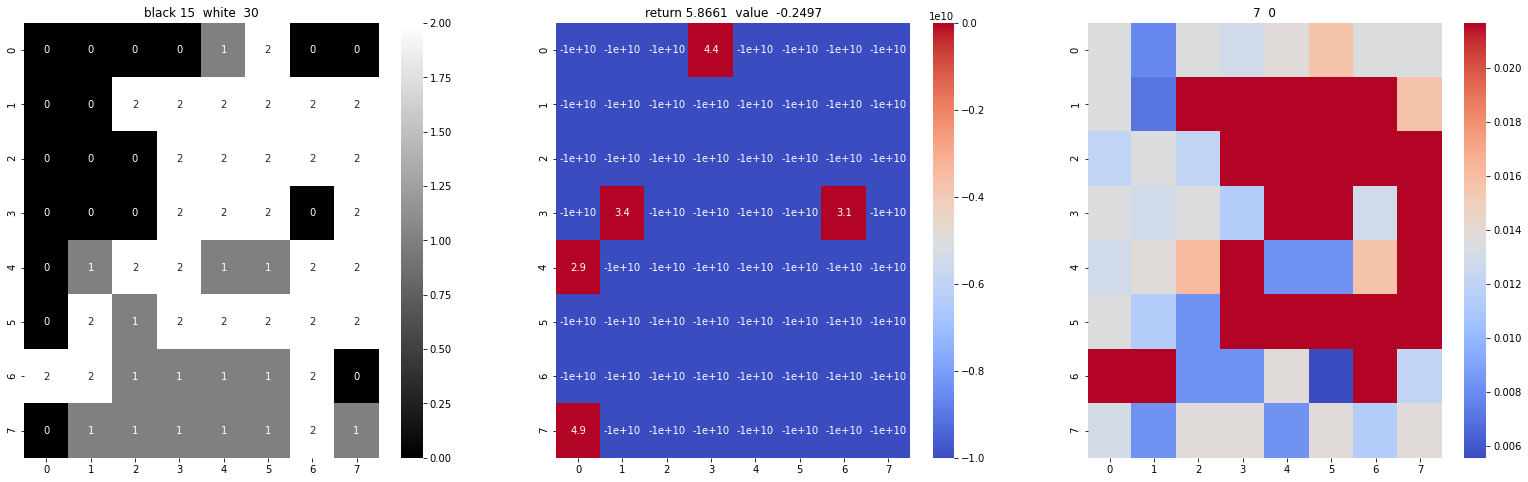

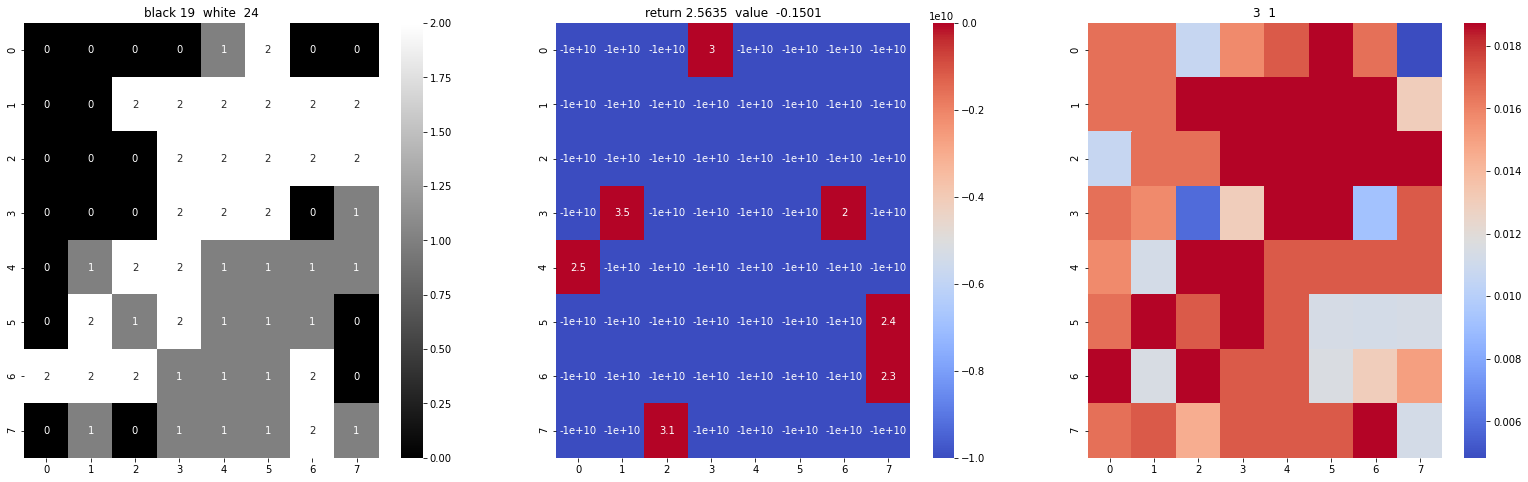

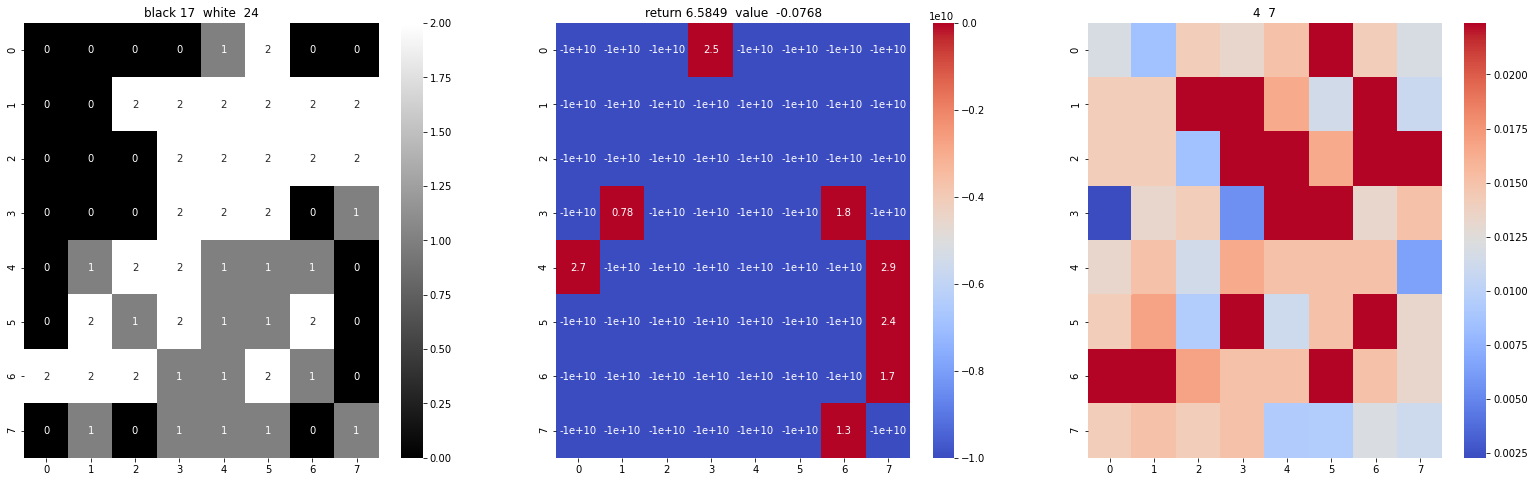

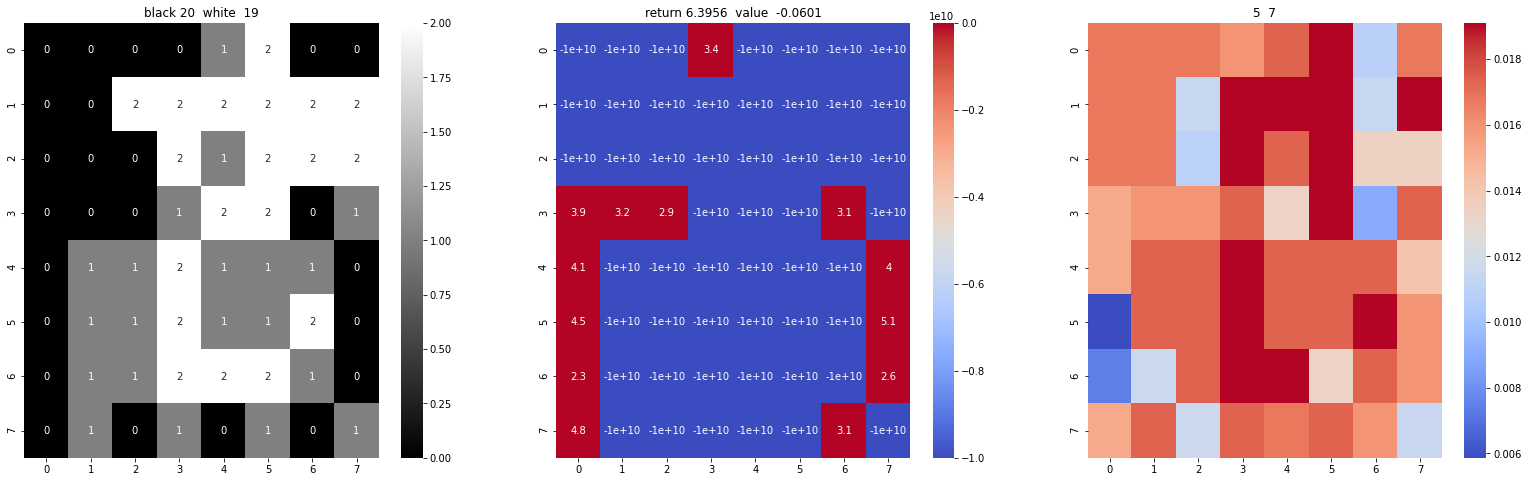

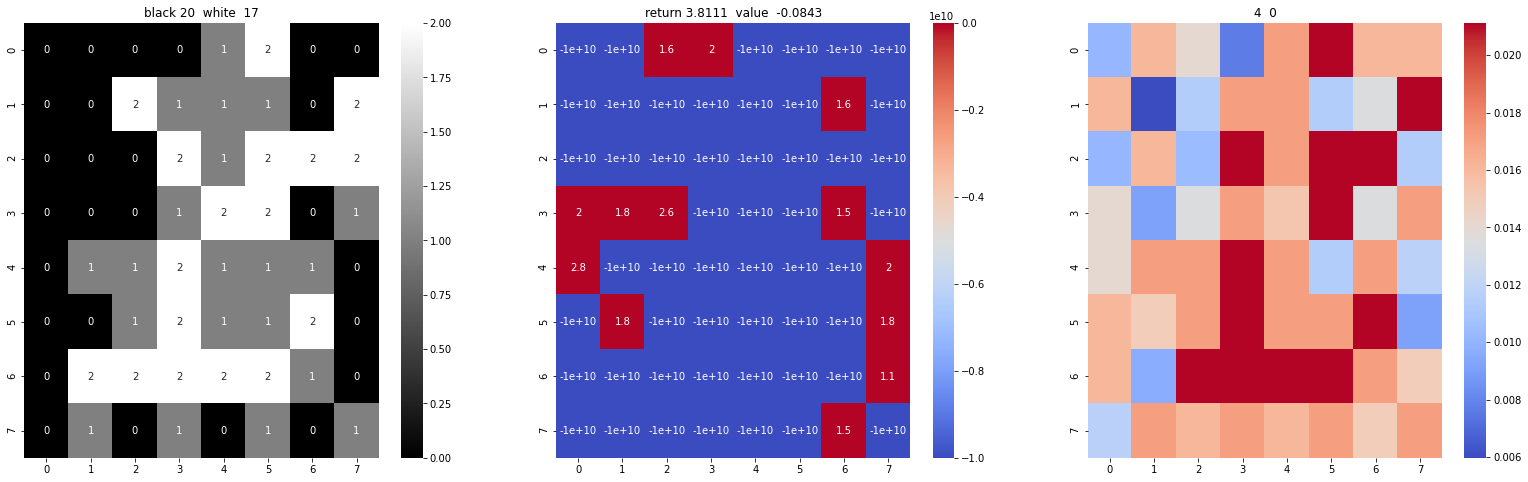

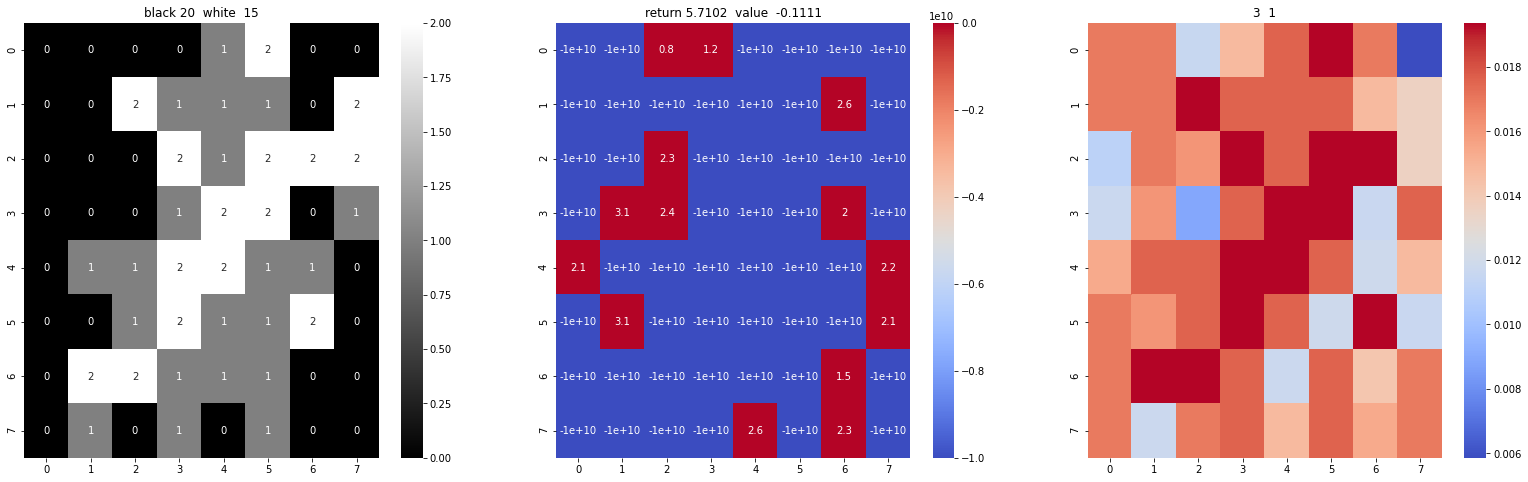

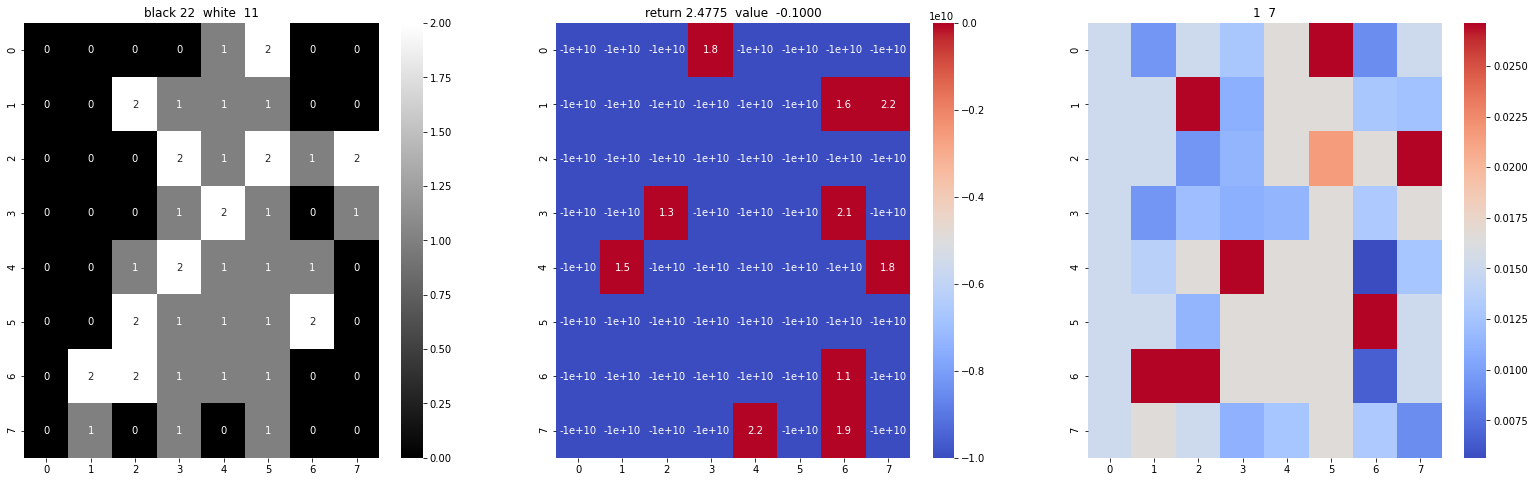

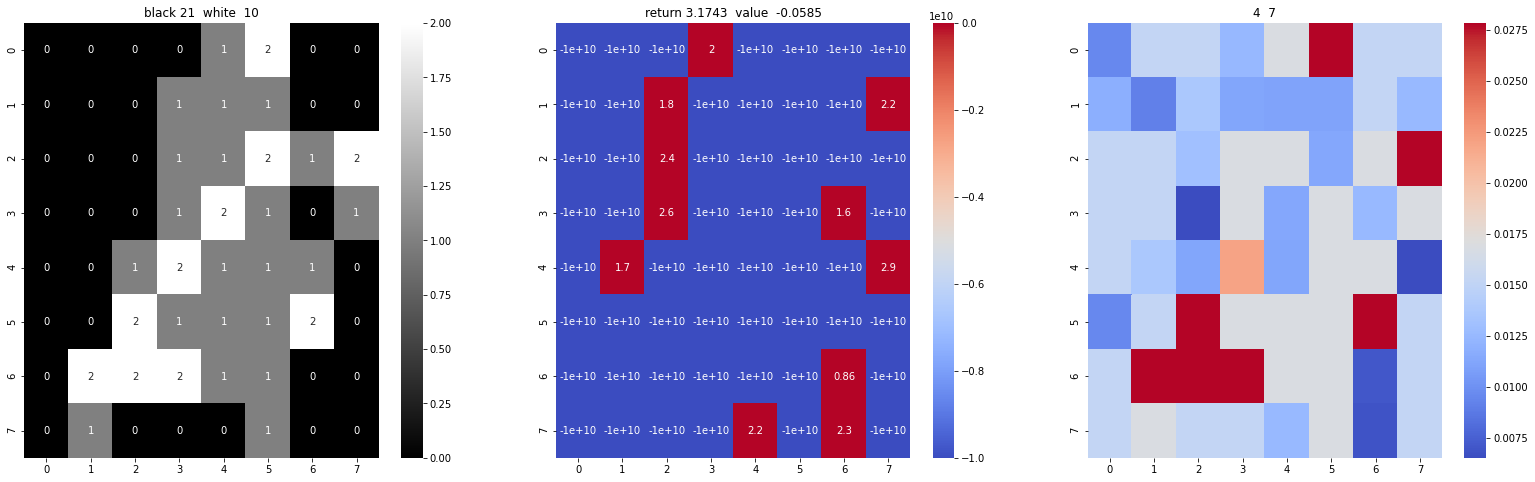

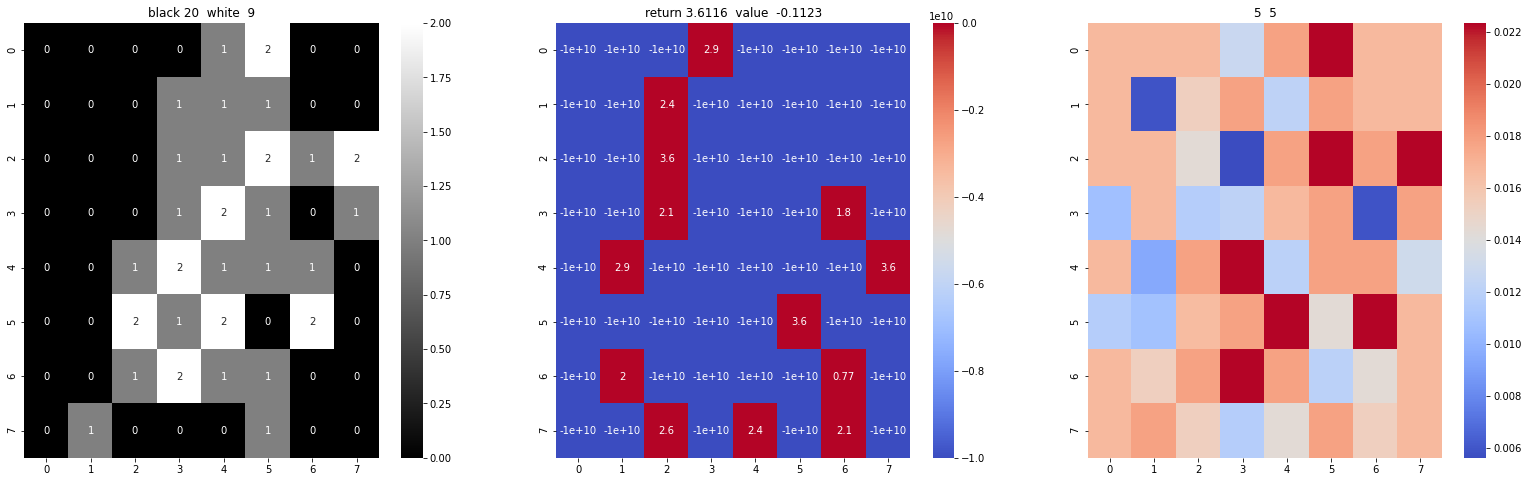

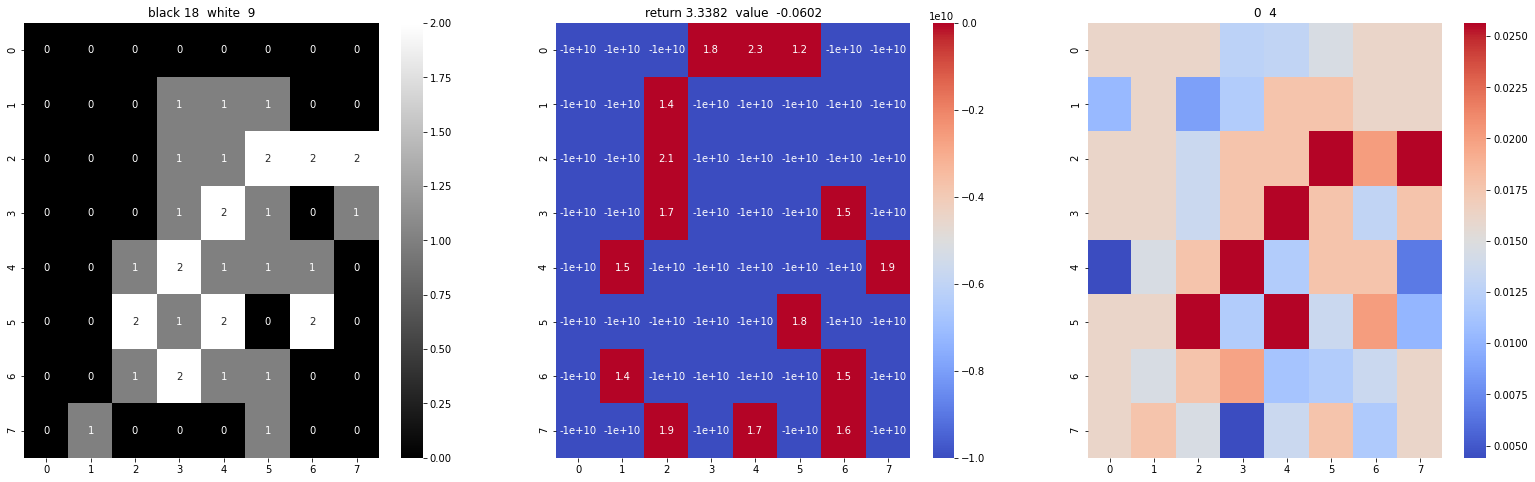

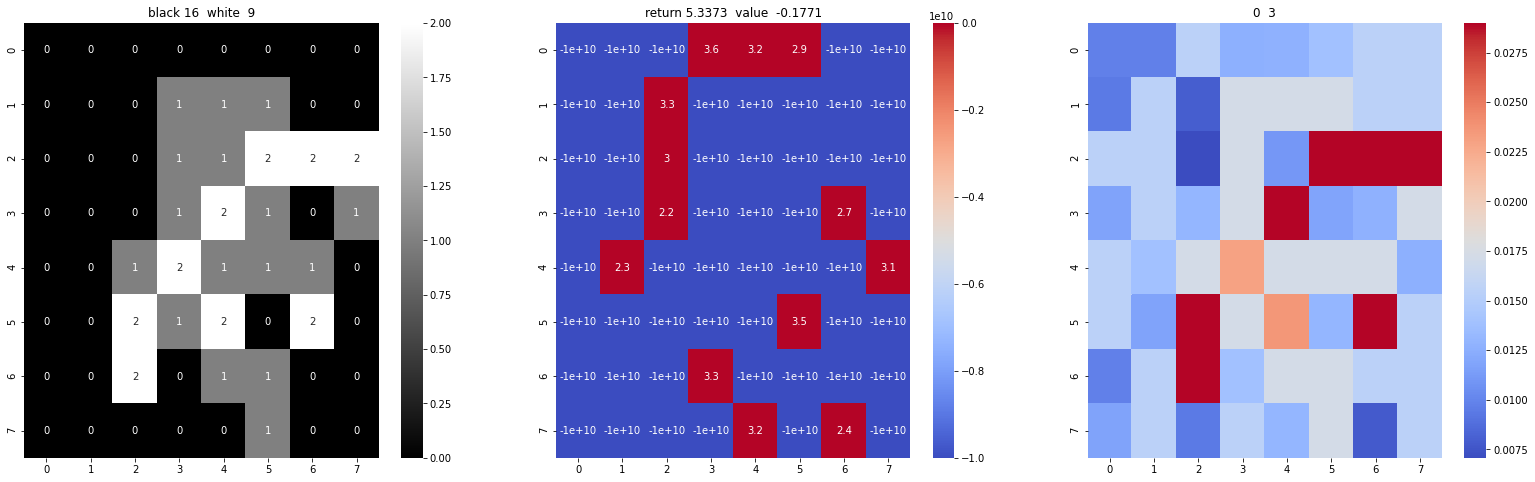

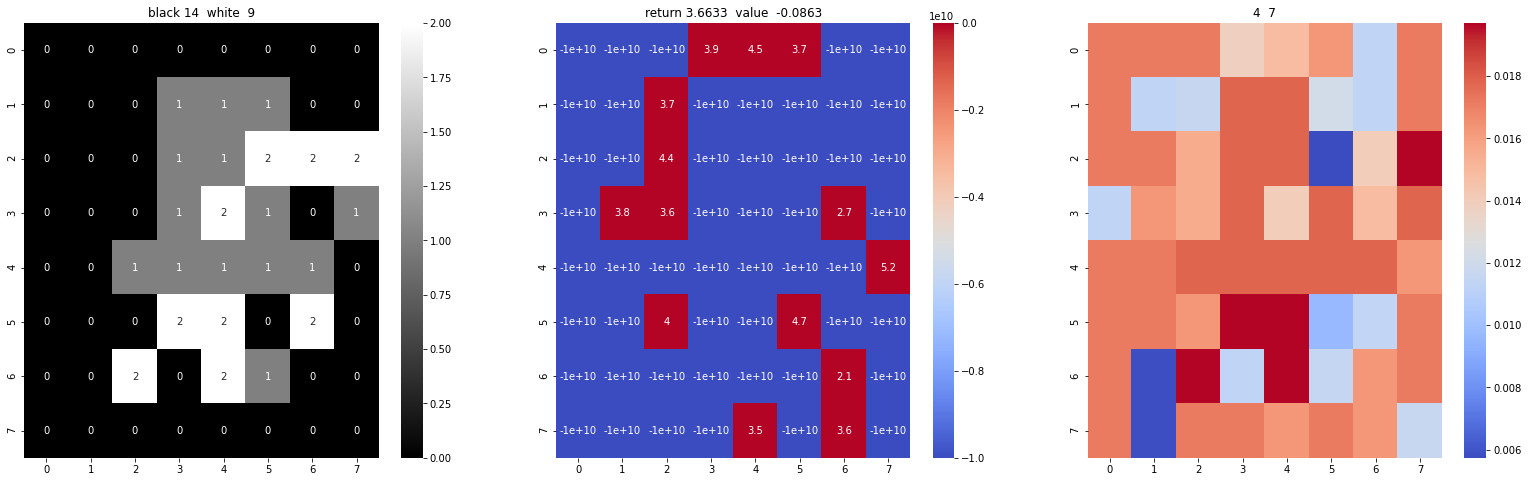

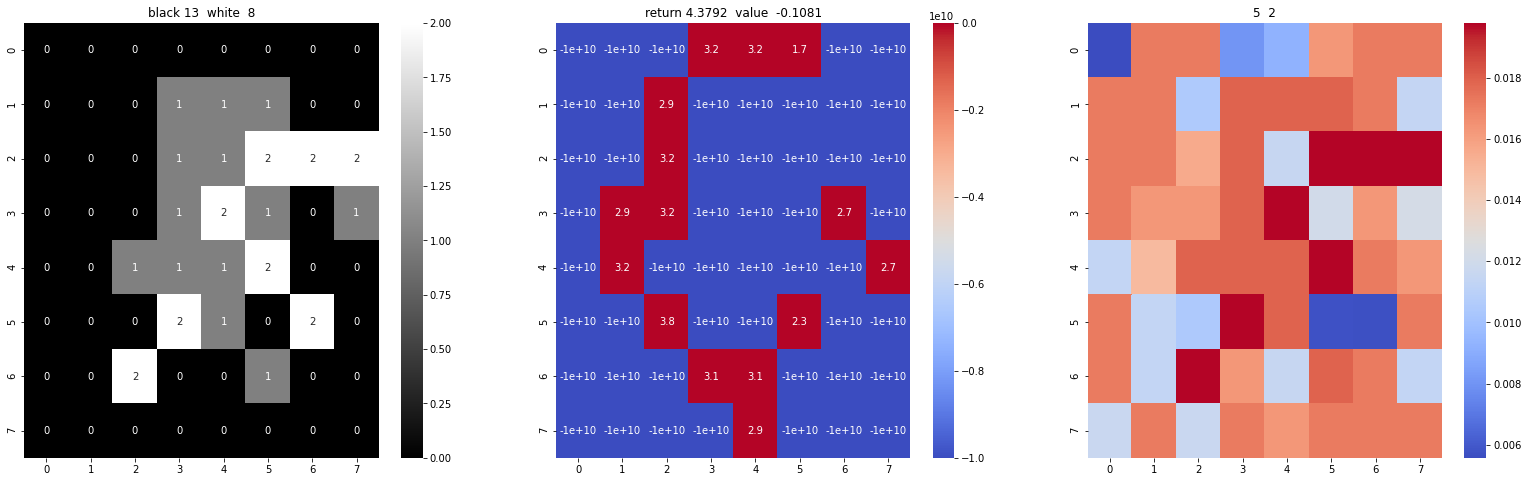

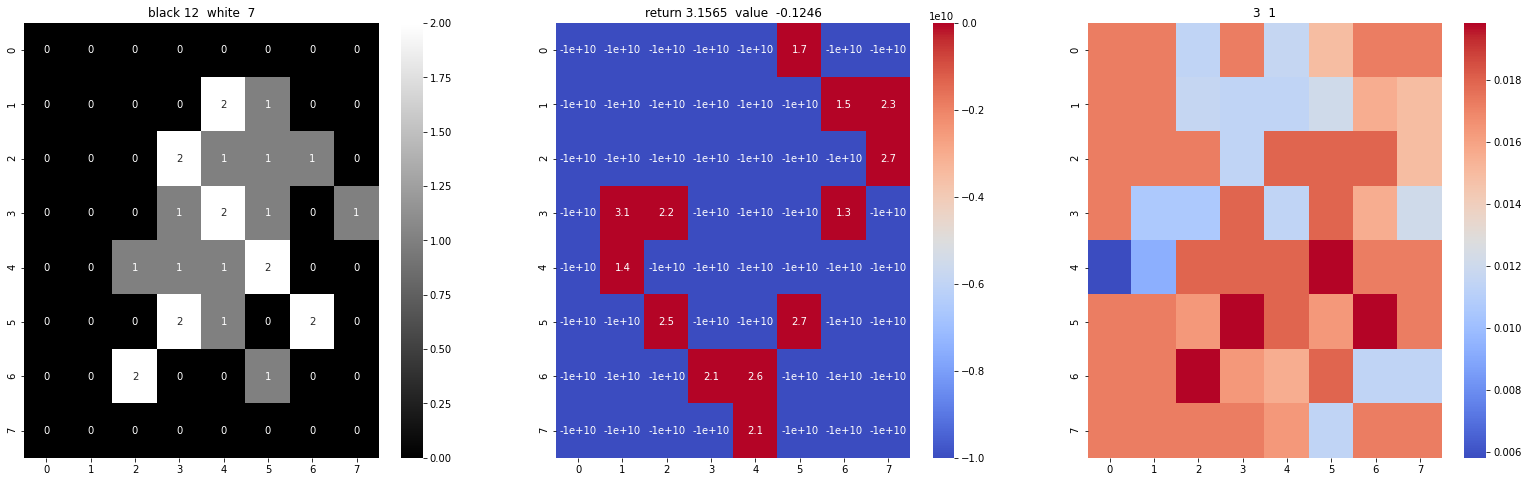

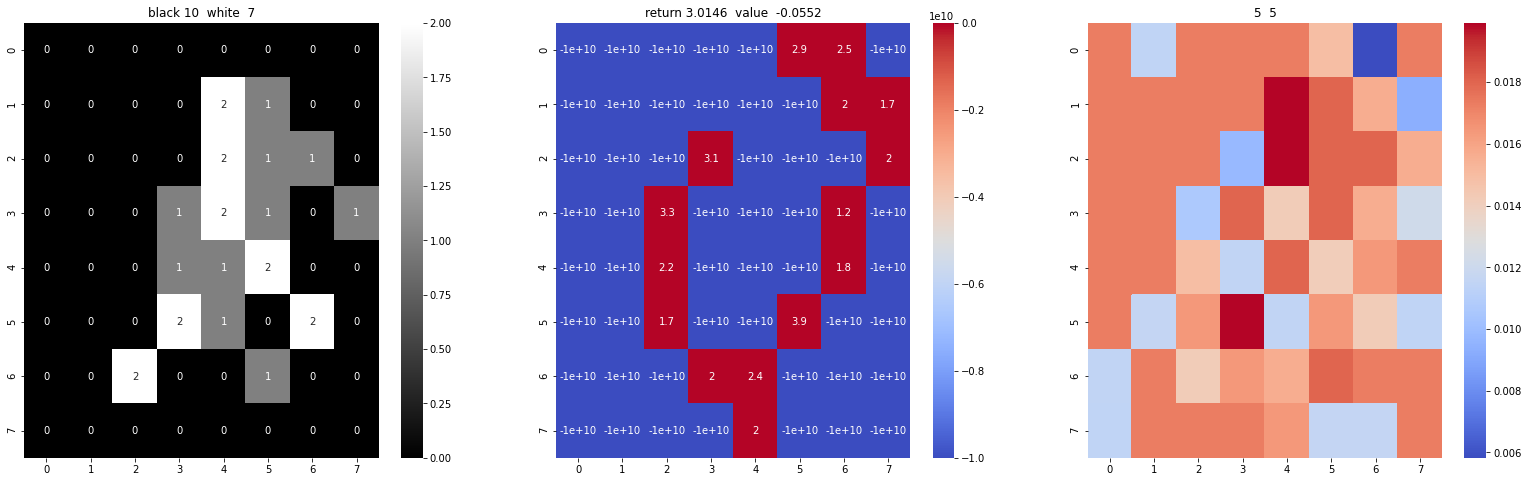

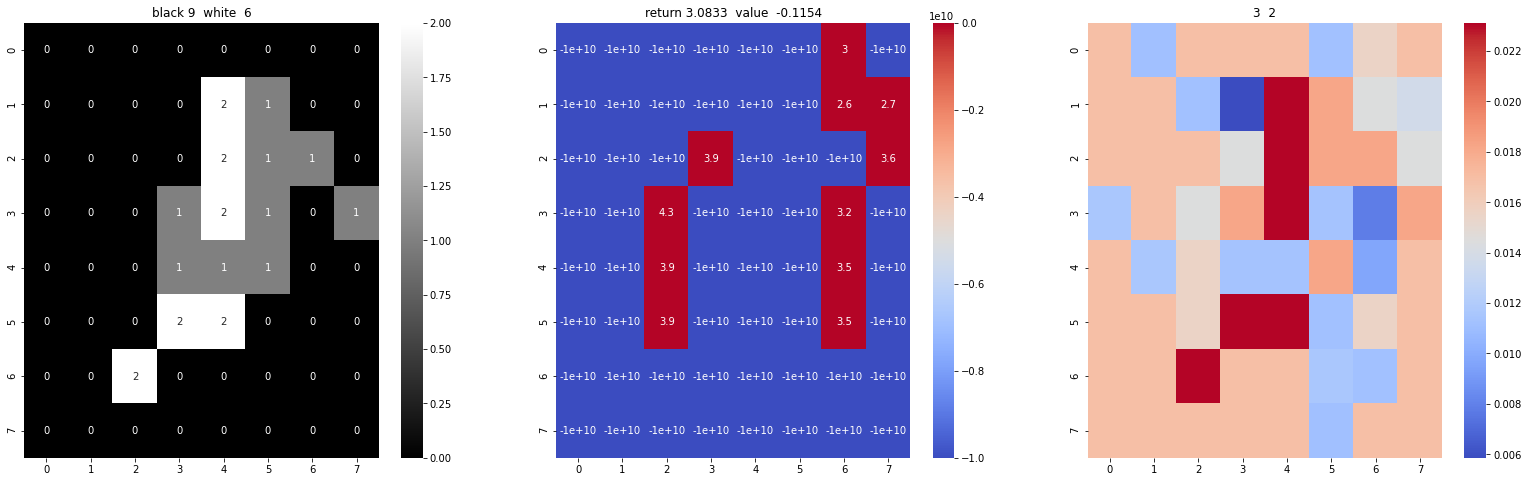

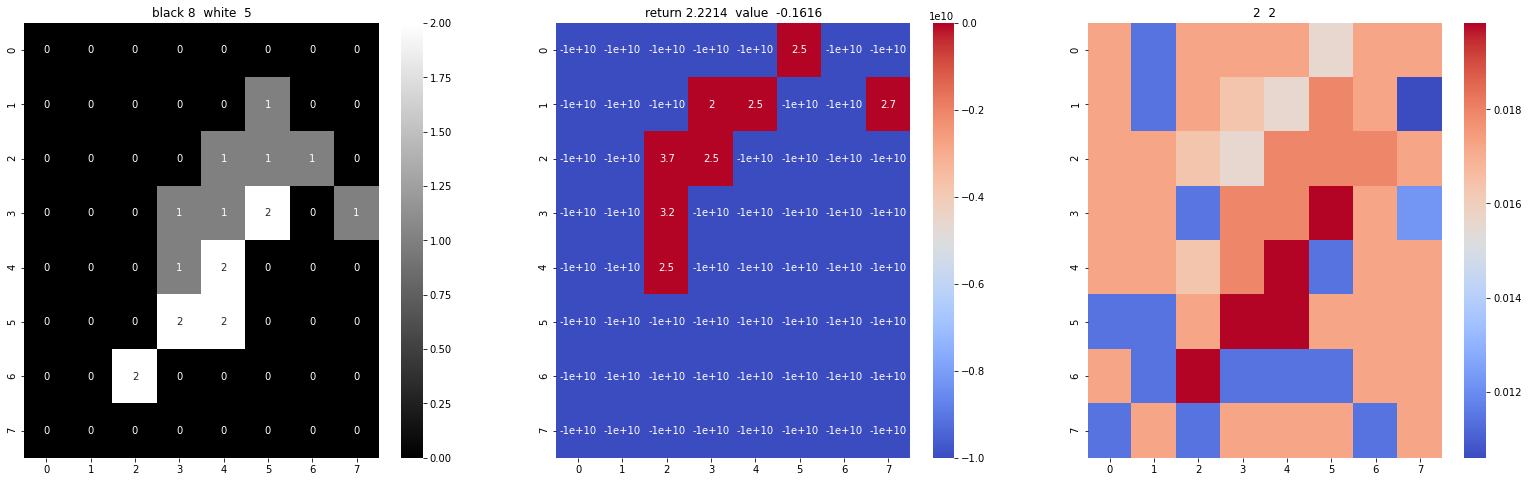

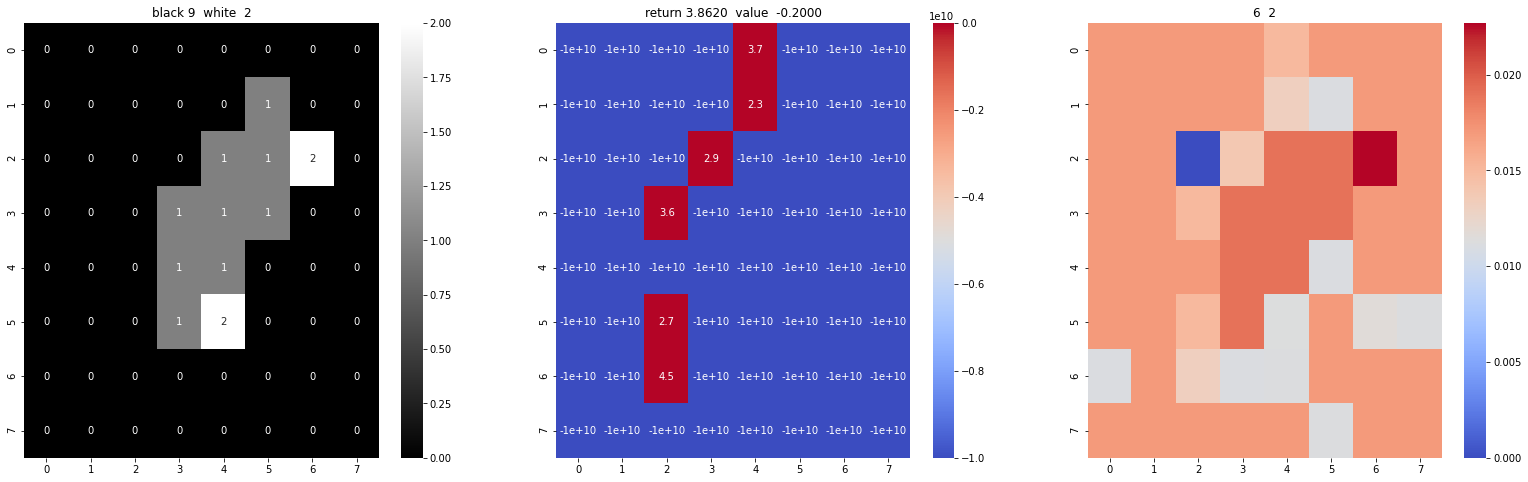

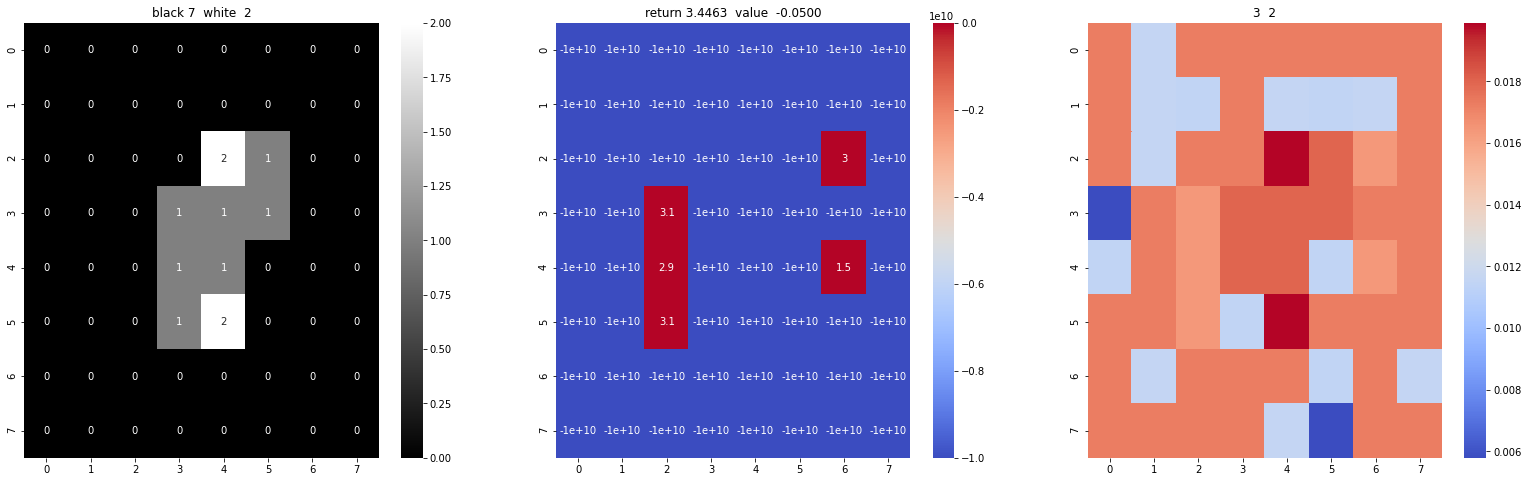

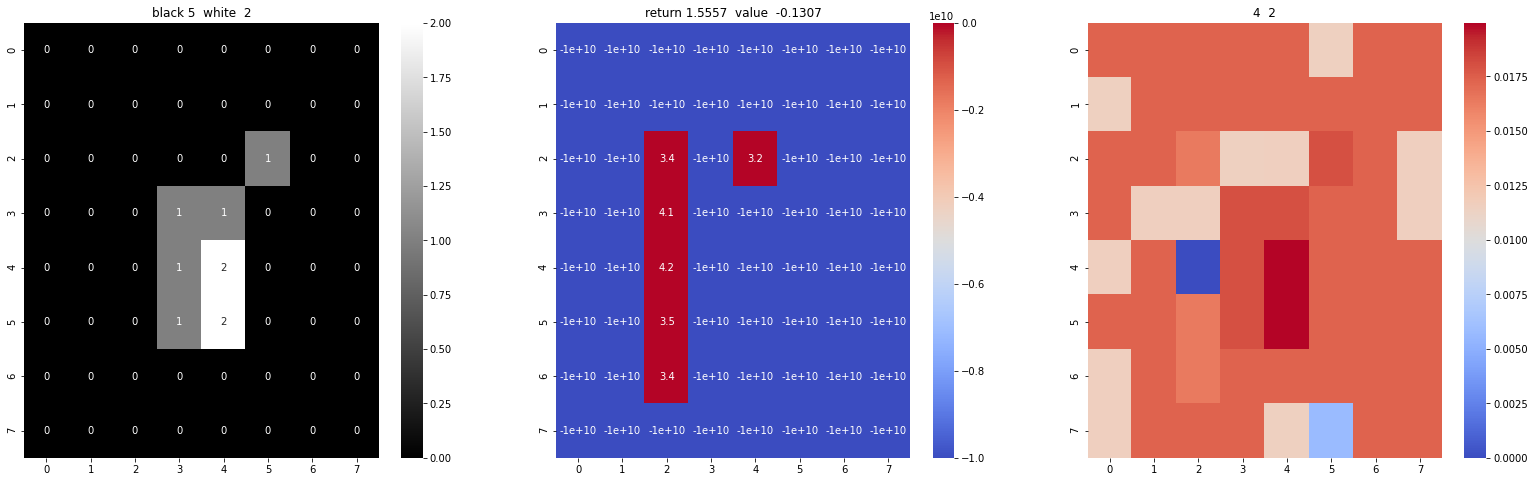

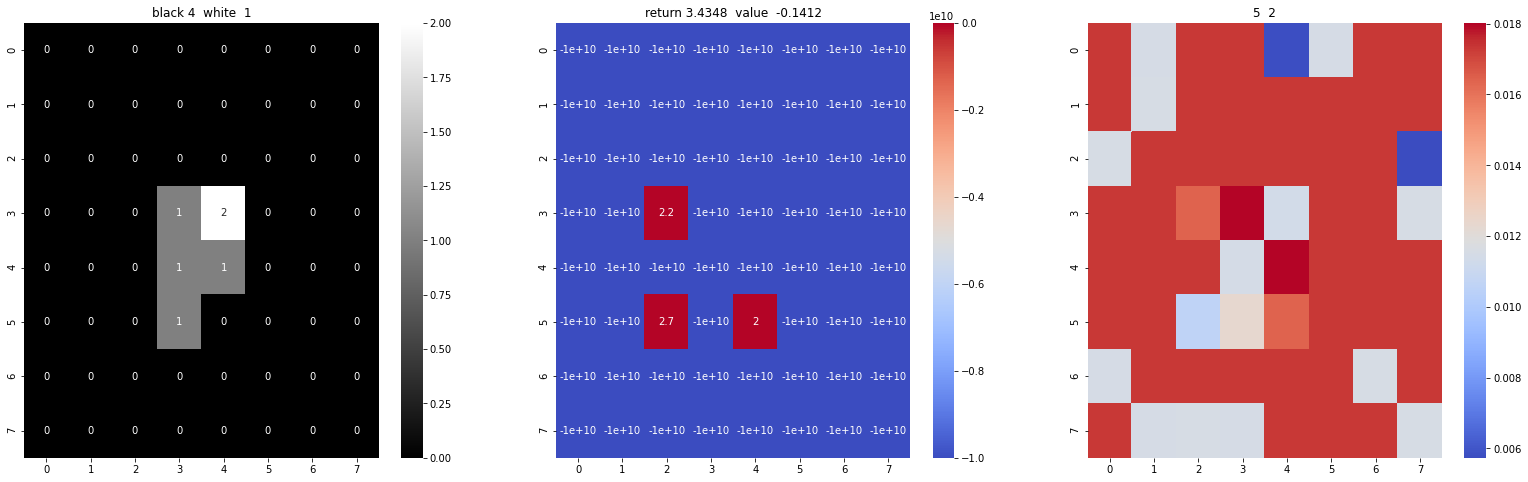

In [8]:
for state, p, v, r, attn  in zip(s, policy, values, returns, attention):
    v_1 = state[0]
    v_2 = state[1]
    board = (v_1+2*v_2).numpy()
    
    plt.figure(figsize=(27,8))
    
    plt.subplot(1,3,1)
    sns.heatmap(board, cmap='gray', annot=True)
    plt.title(f"black {len(v_1[v_1==1])}  white  {len(v_2[v_2==1])}")
    
    
    plt.subplot(1,3,2)    
    sns.heatmap(p.reshape(8,8), cmap='coolwarm', annot=True)
    plt.title(f"return {r:.4f}  value  {v:.4f}")
    
    plt.subplot(1,3,3)    
    action = p.argmax()
    p_attn = attn[action]
    sns.heatmap(p_attn.reshape(8,8), cmap='coolwarm')
    plt.title(f"{action//8}  {action%8}")
    plt.show()

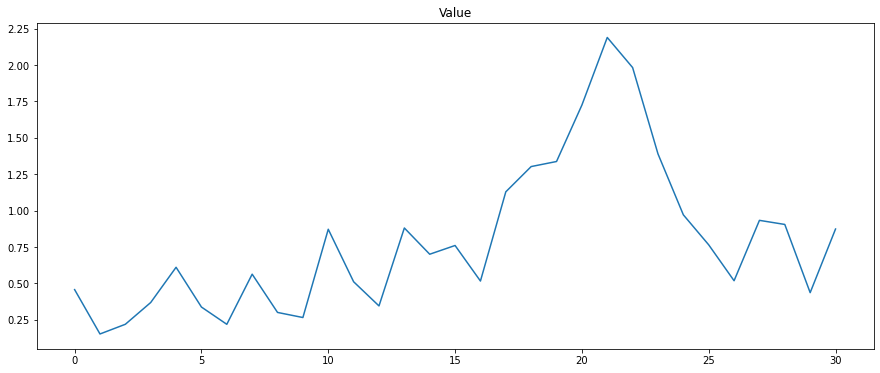

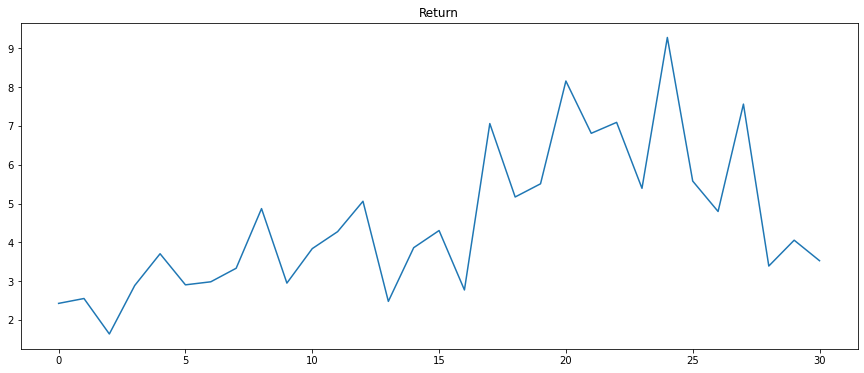

In [9]:
s = data_1['states']
out = agent_1.model(s)
policy = out["policy"].detach().numpy()[1:]
values = out["value"].detach().numpy()[1:]
returns = out["return"].detach().numpy()[1:]
attention = out["attention"].detach().numpy()[1:]

s = s[1:]
s_2 = s[:,2,:,:].flatten(1).detach().numpy()
policy[s_2==0]=-1e10

values = values.flatten()
returns = returns.flatten()

plt.figure(figsize=(15,6))
plt.plot(out["value"].detach().numpy()[::-1])
plt.title('Value')
plt.show()

plt.figure(figsize=(15,6))
plt.plot(out["return"].detach().numpy()[::-1])
plt.title('Return')
plt.show()

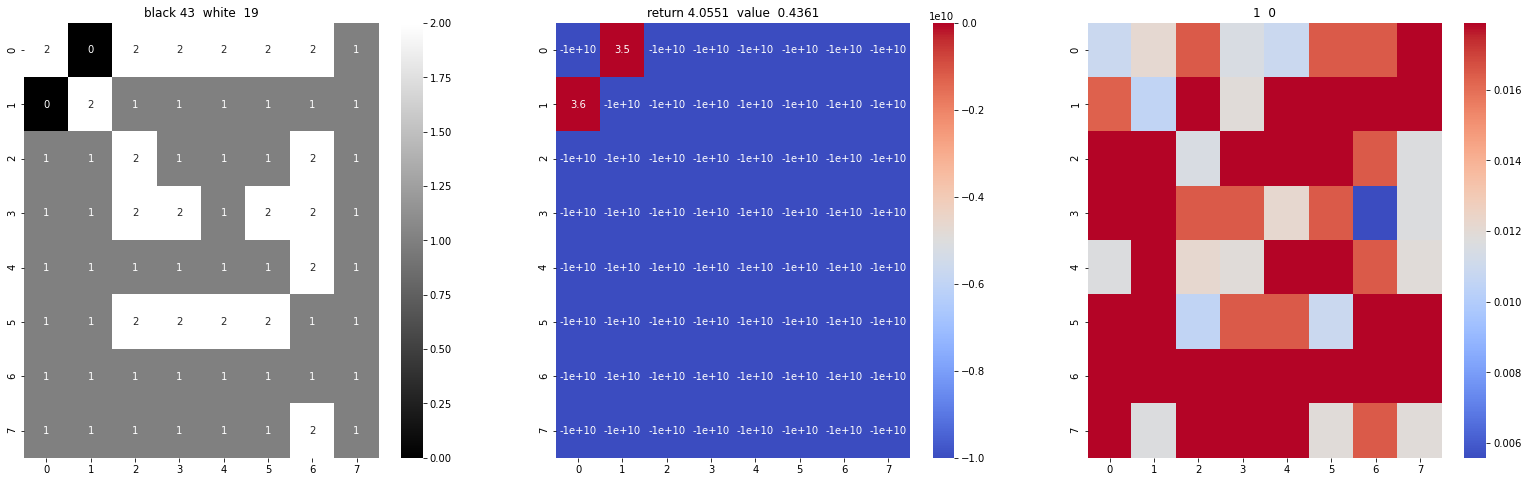

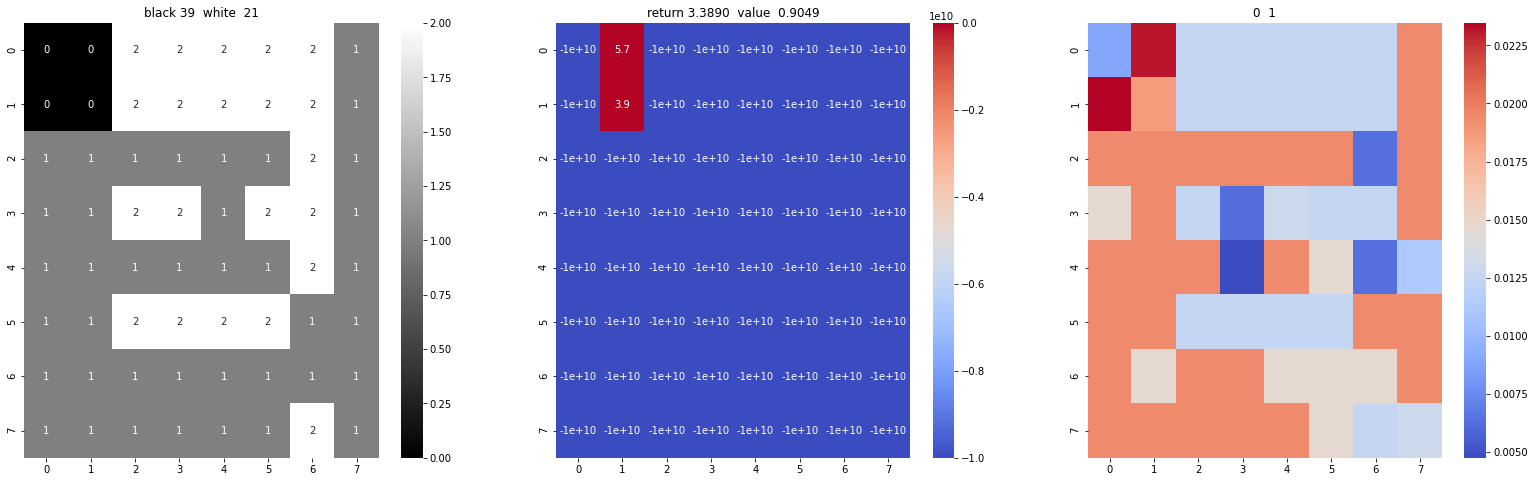

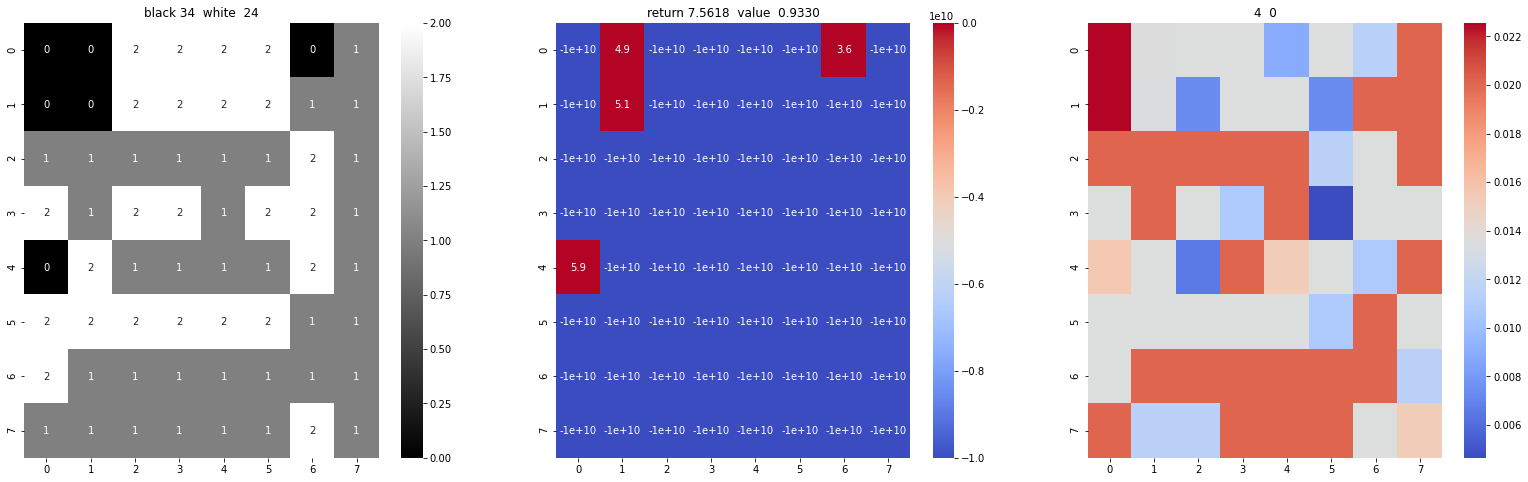

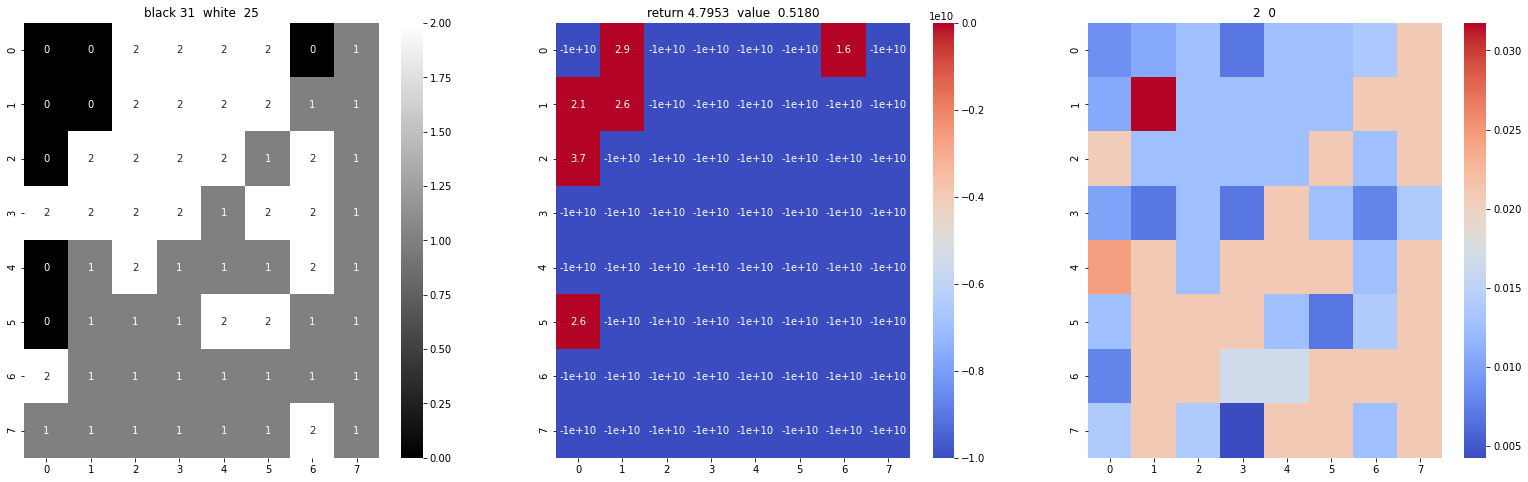

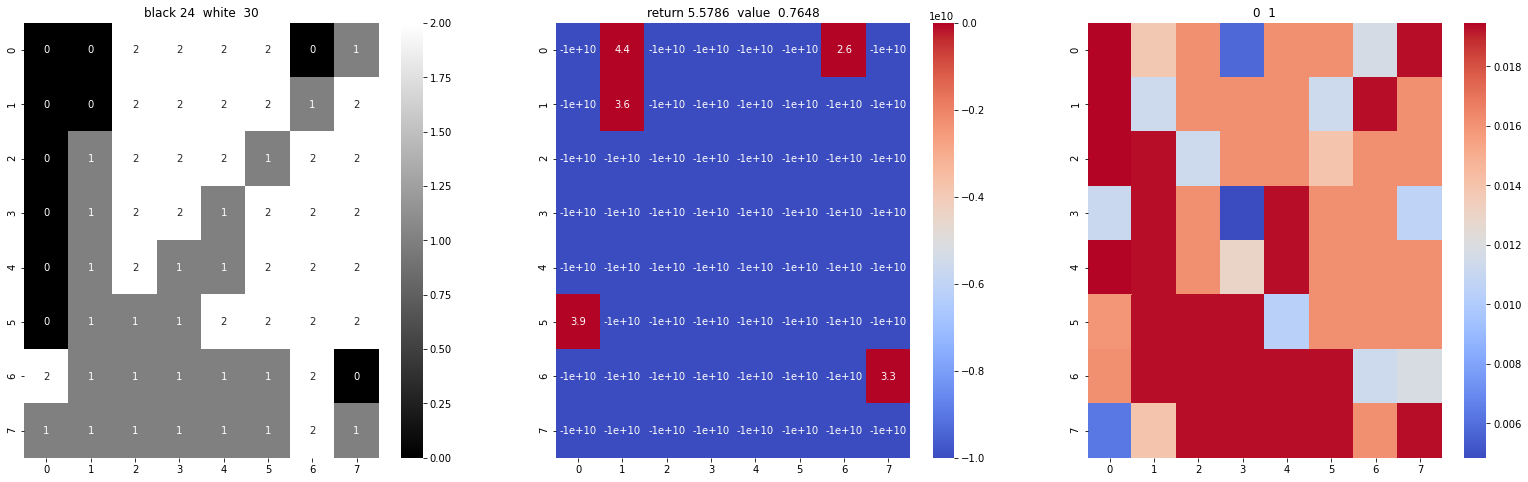

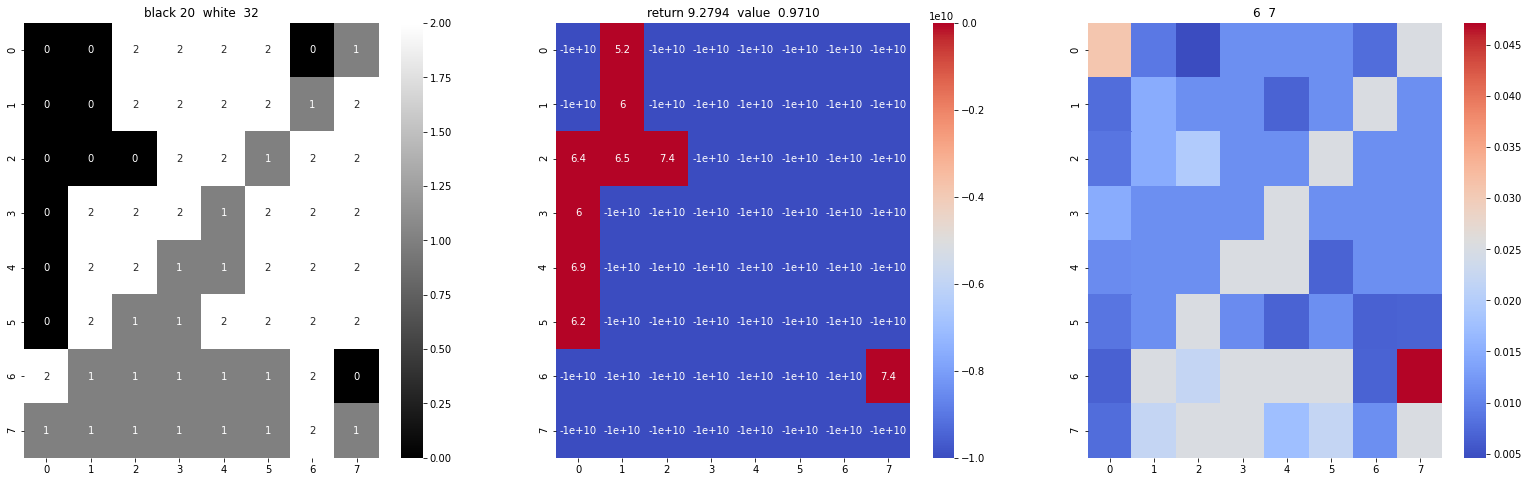

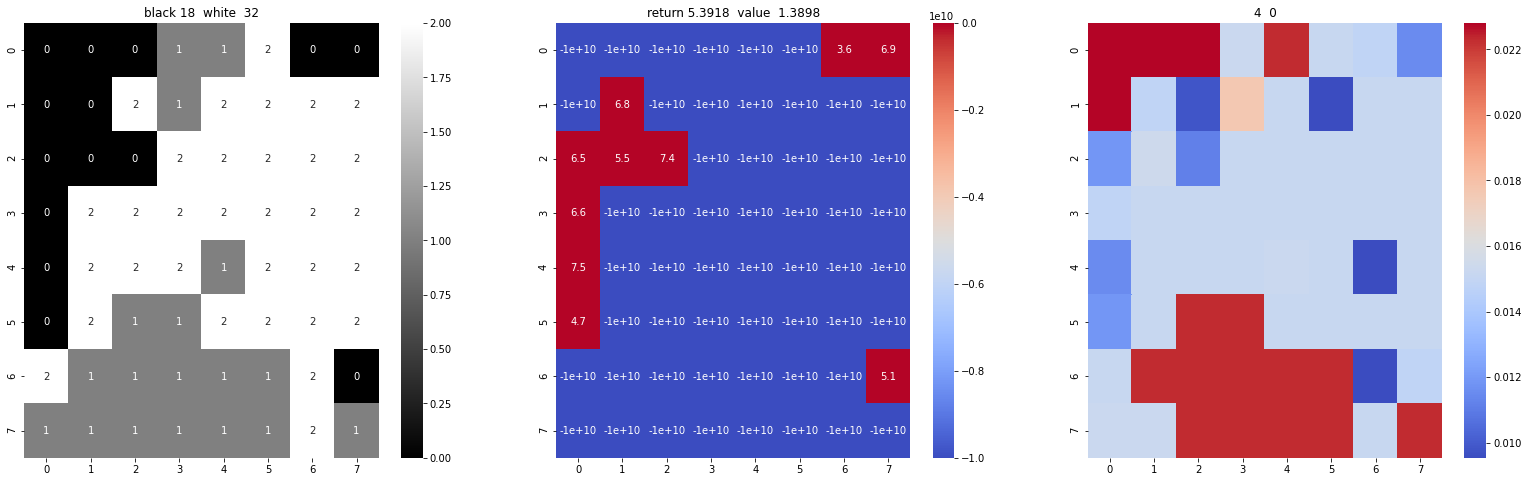

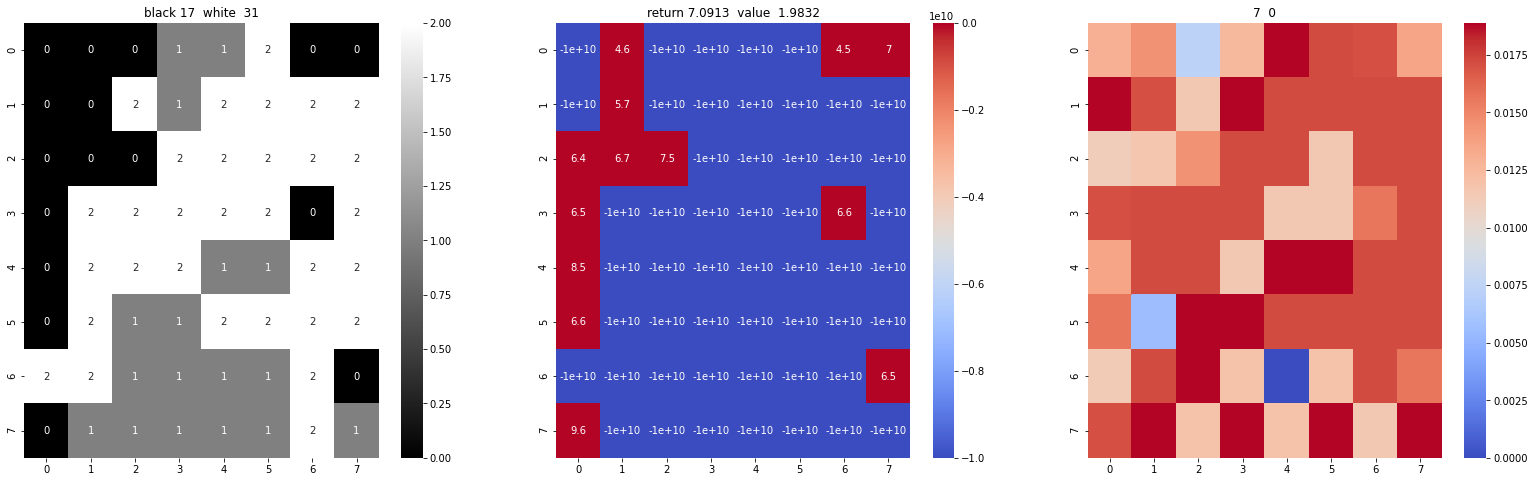

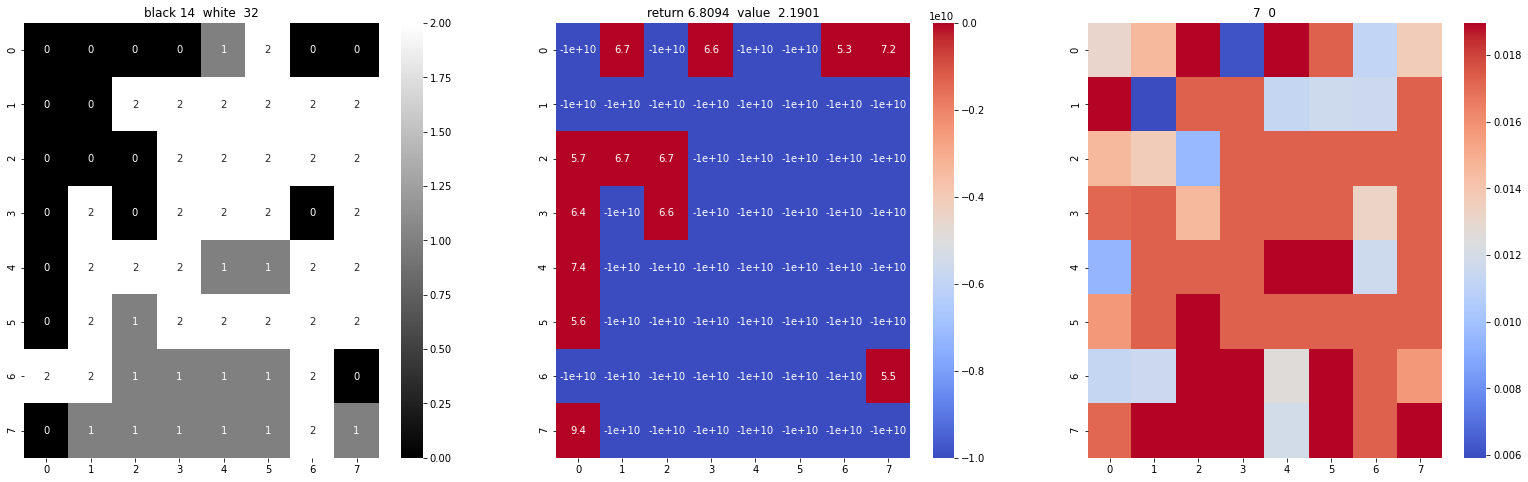

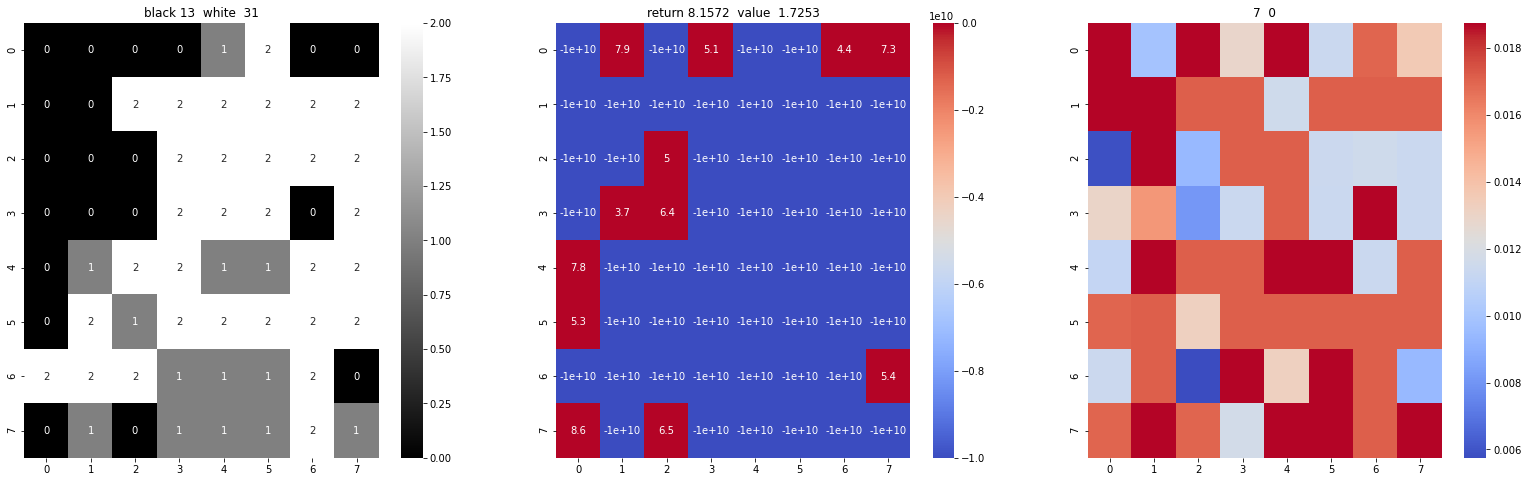

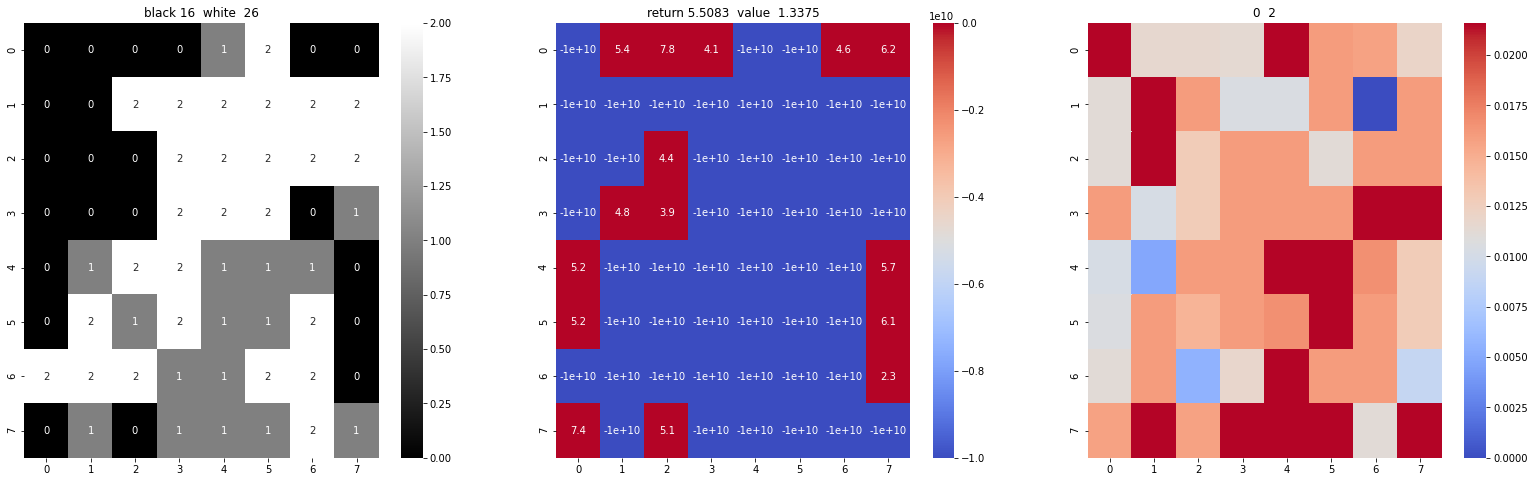

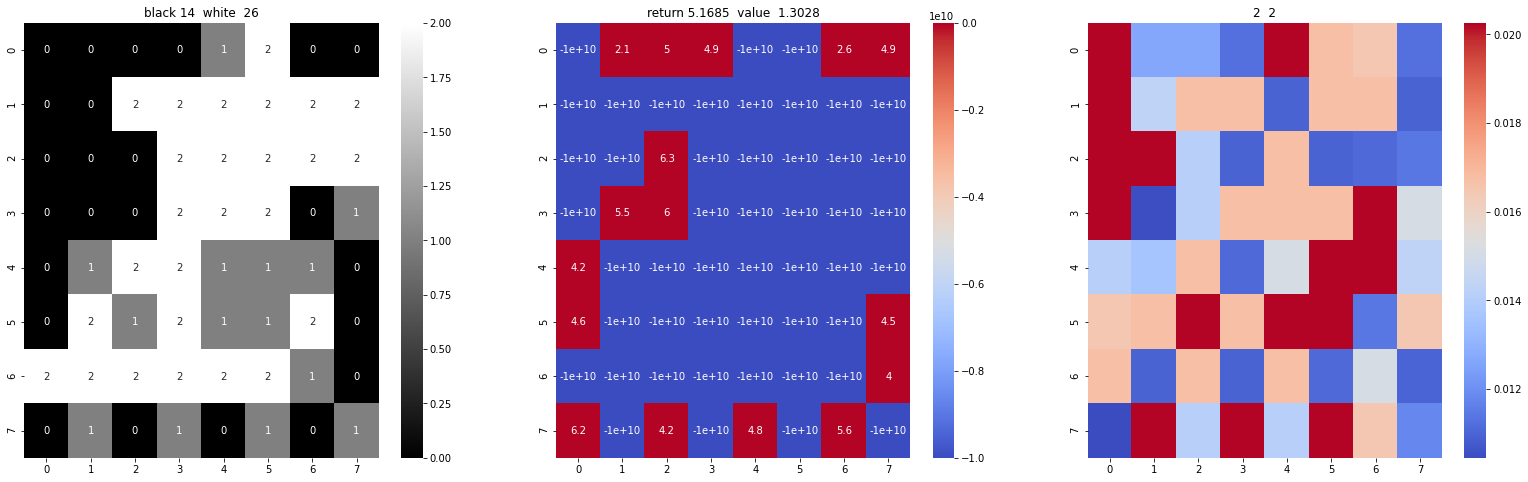

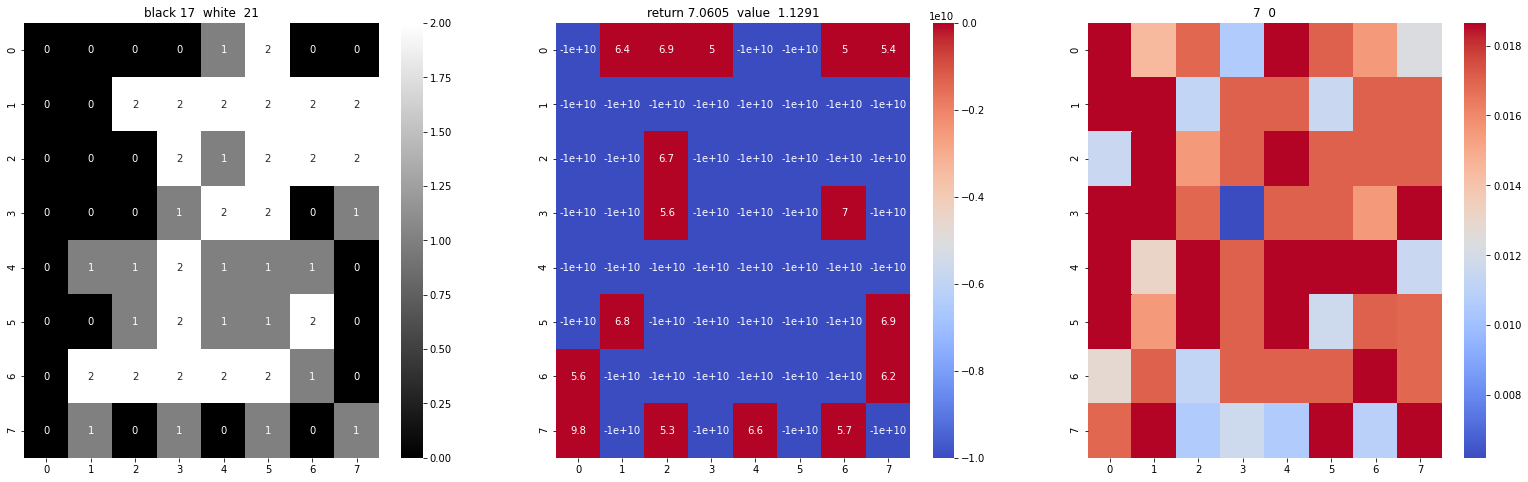

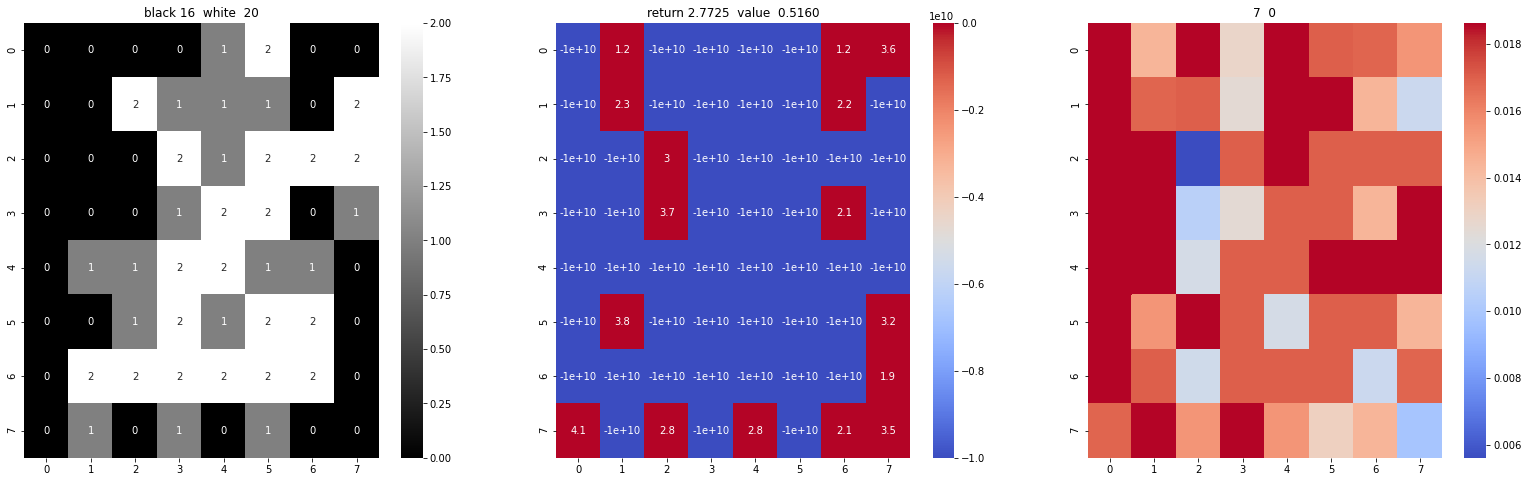

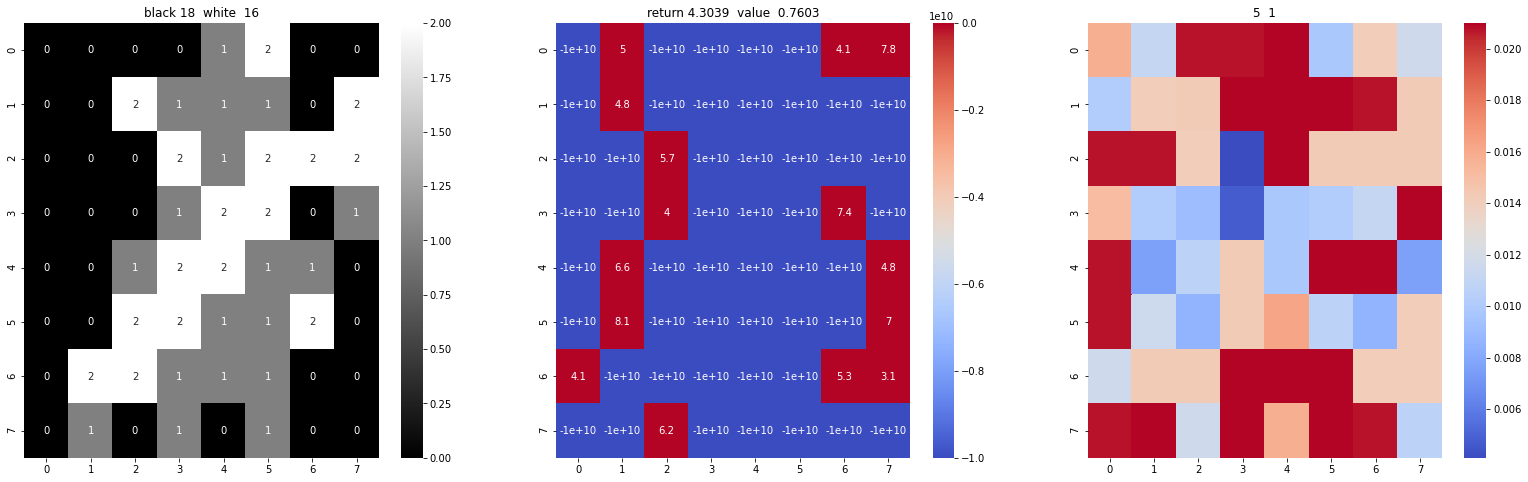

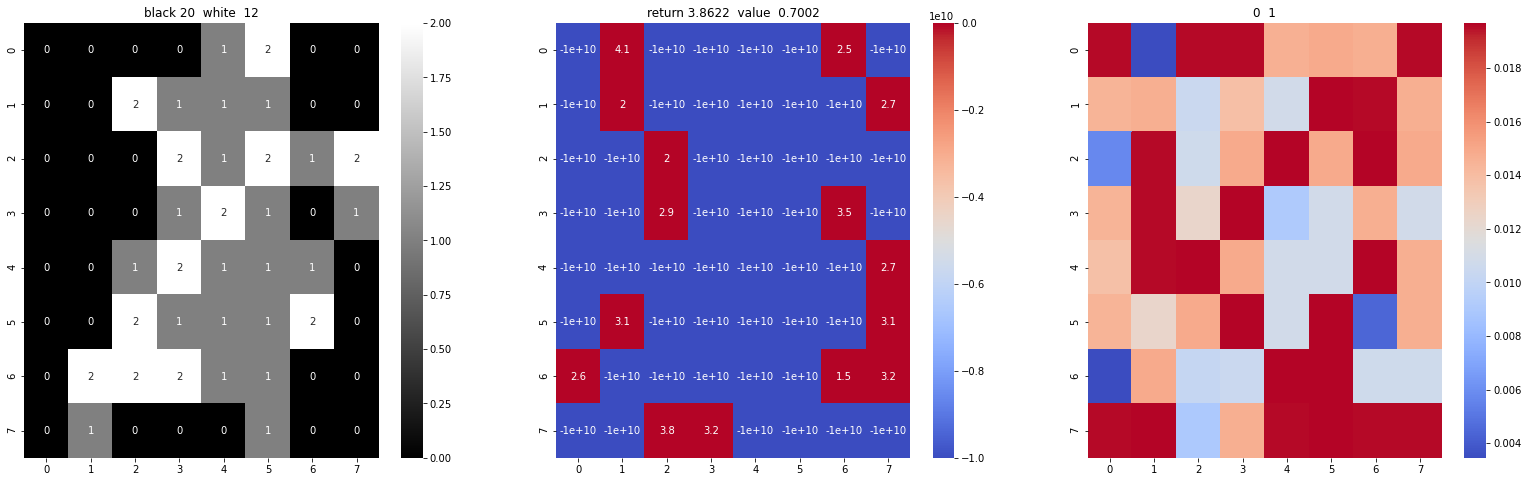

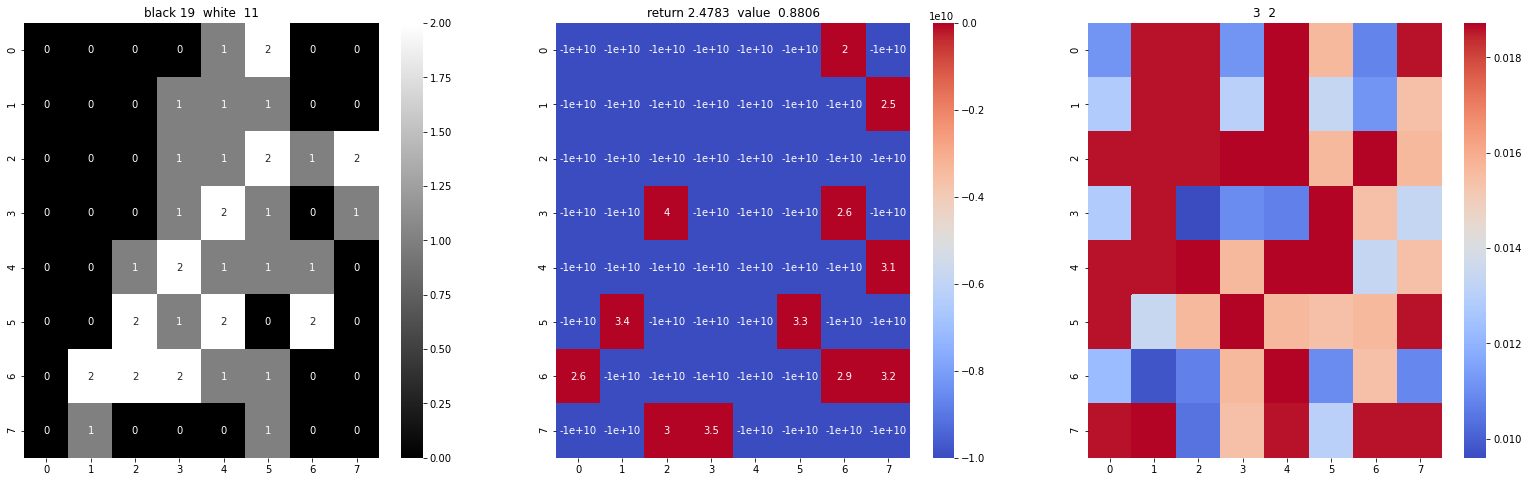

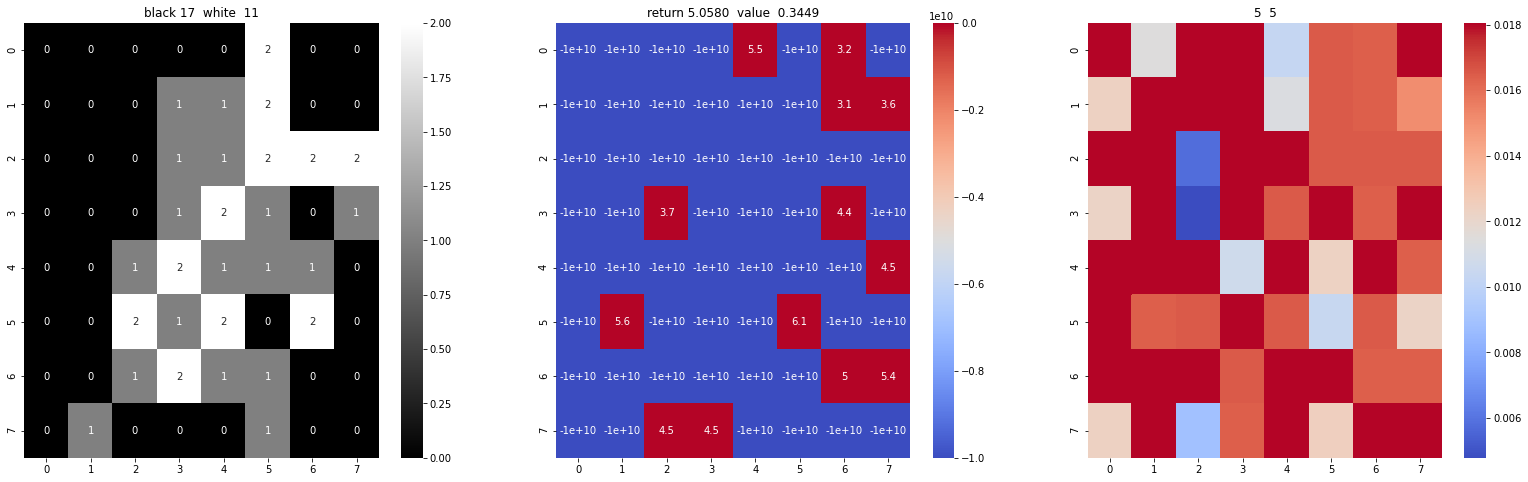

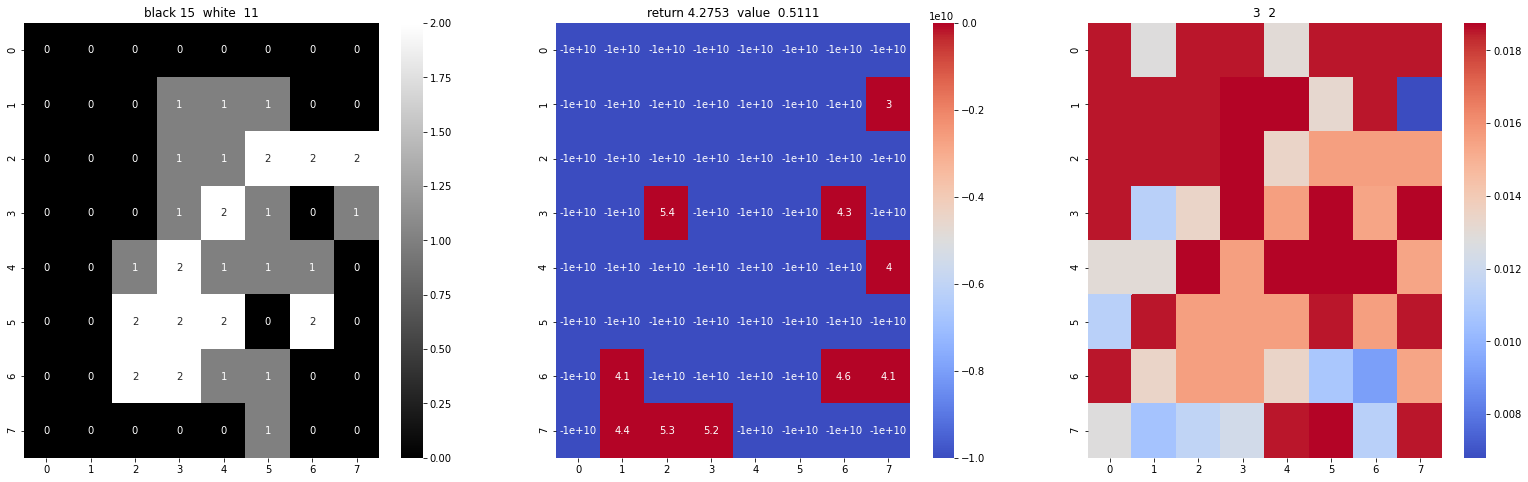

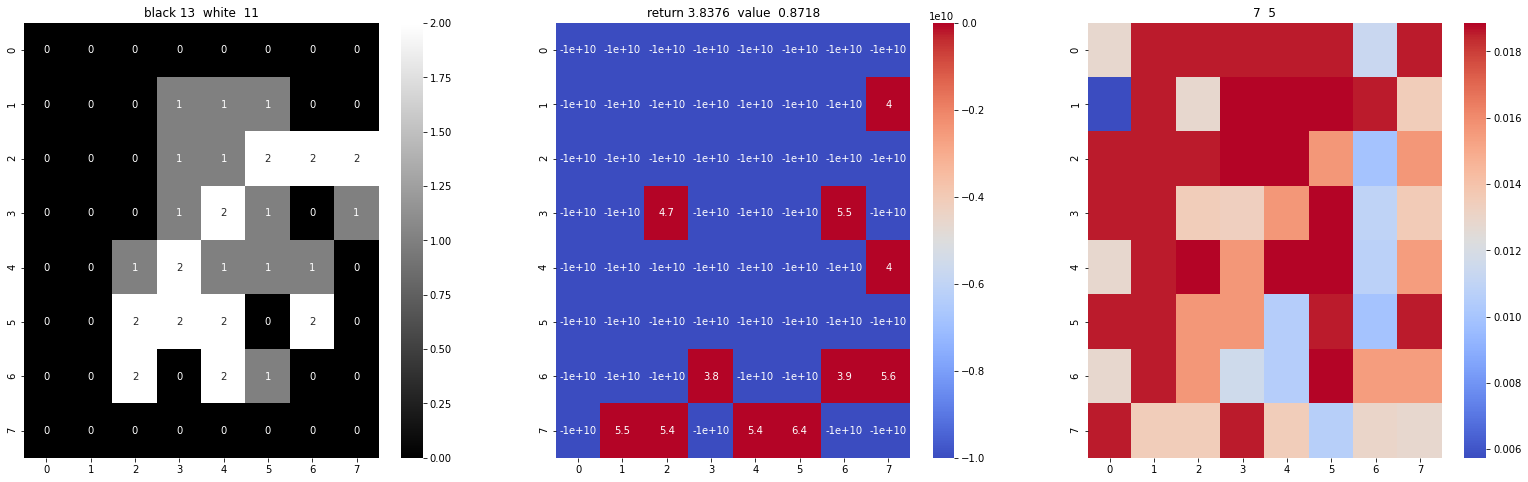

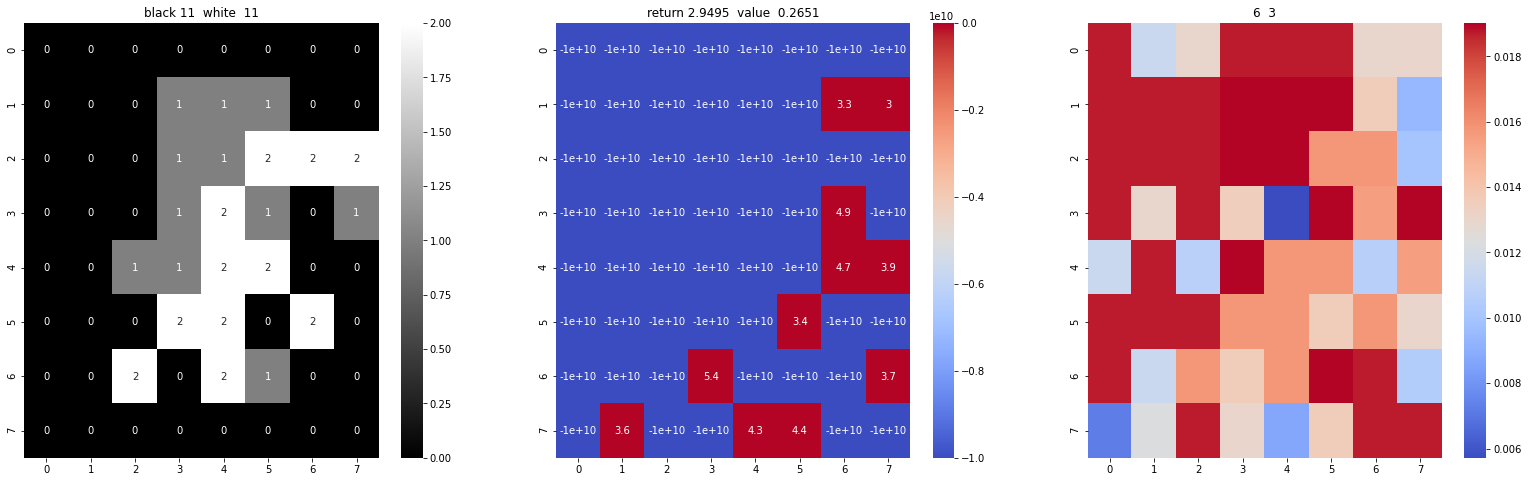

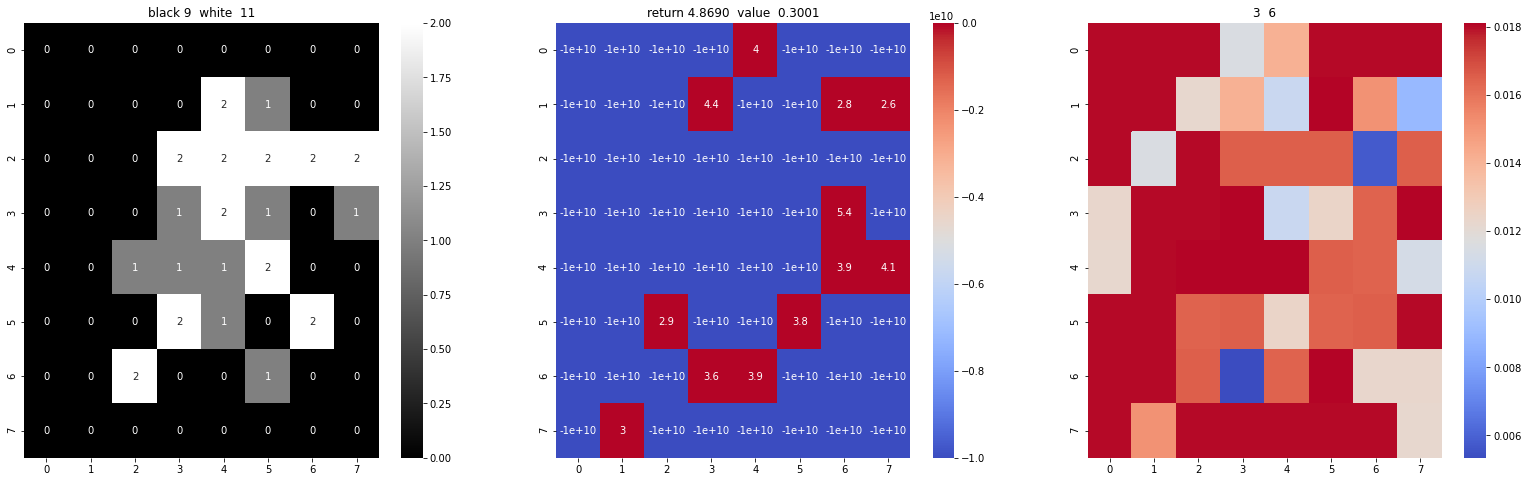

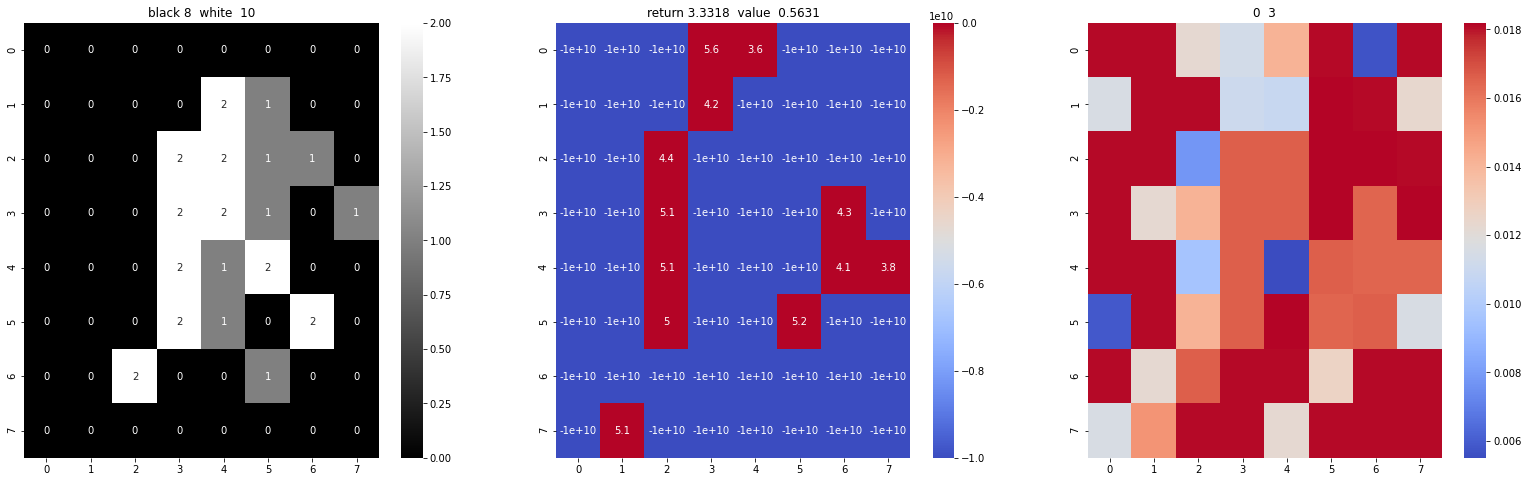

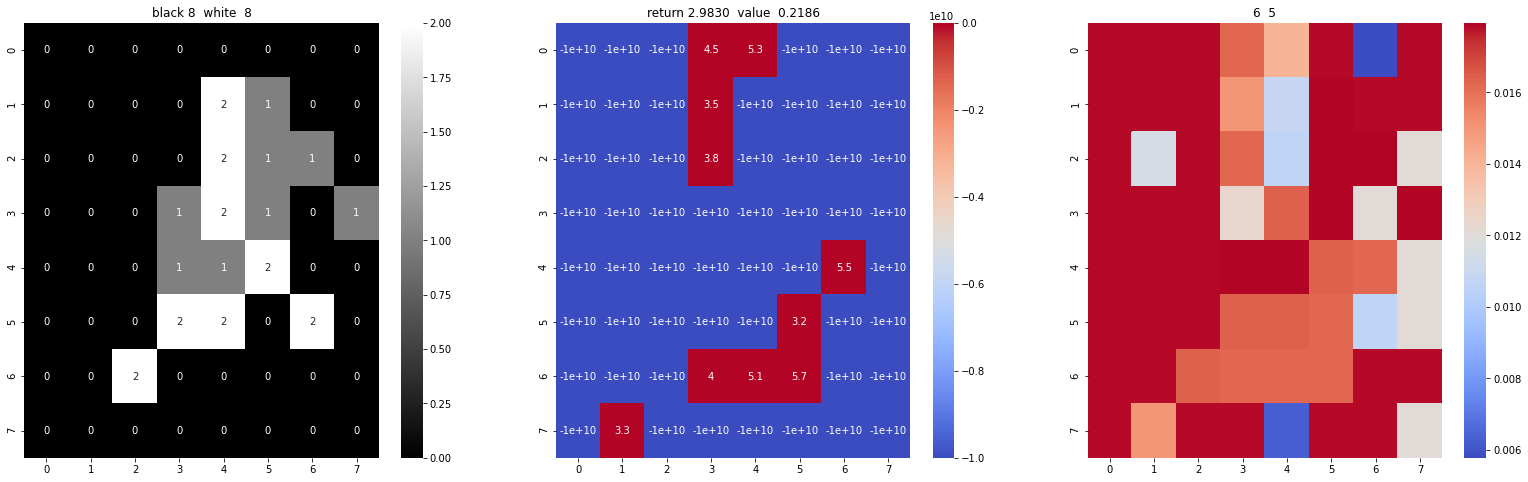

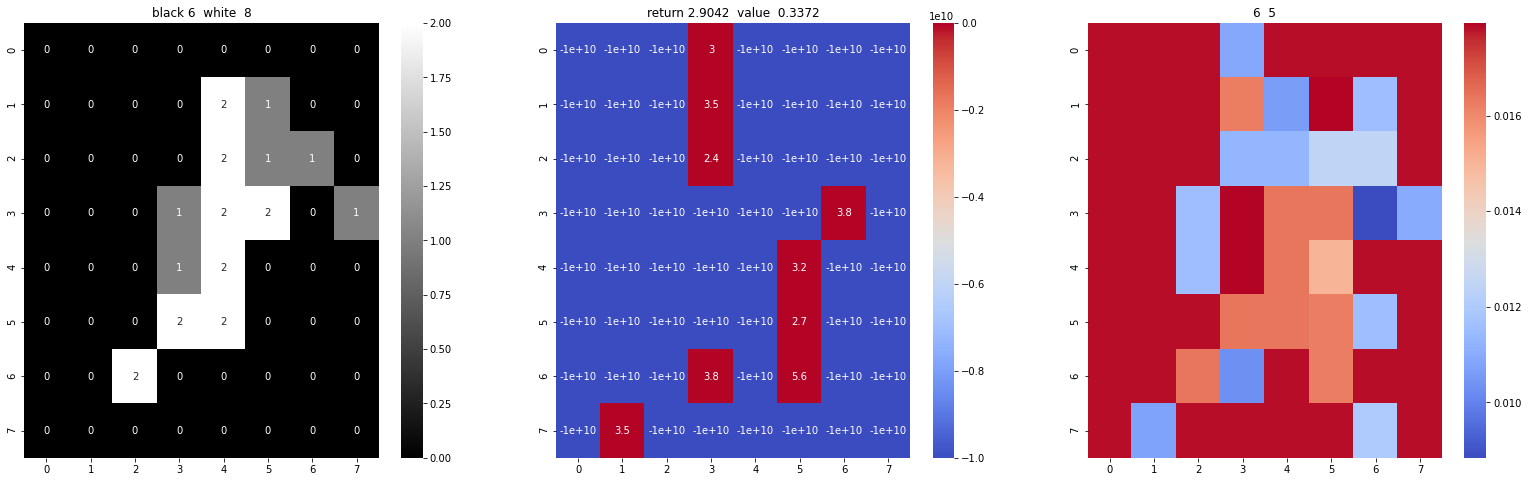

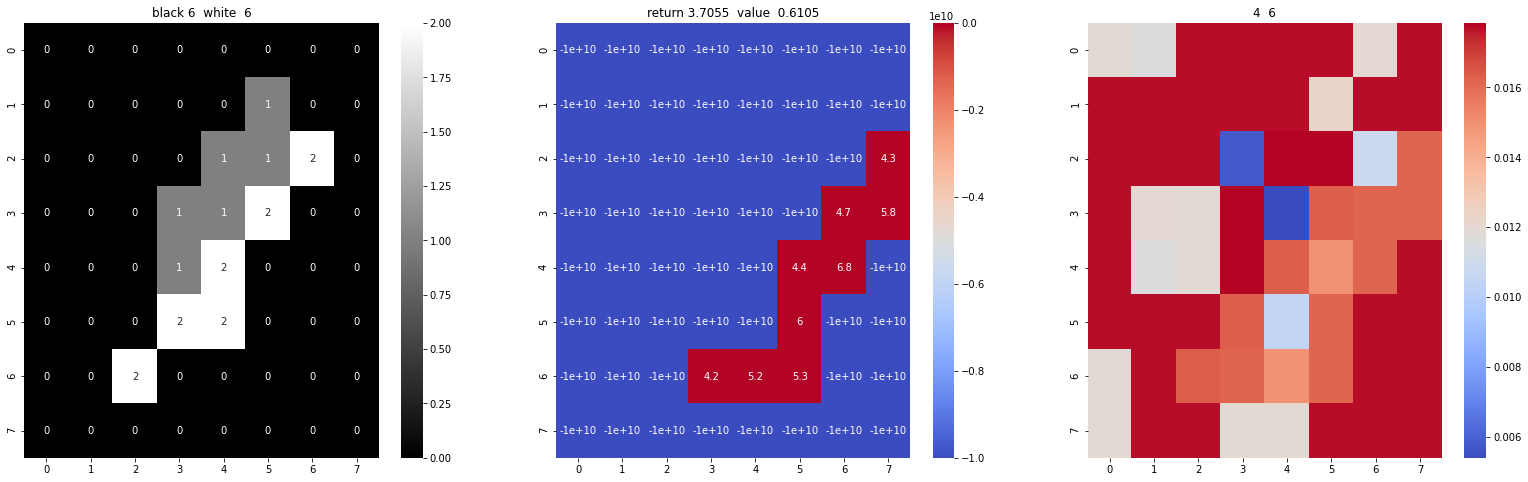

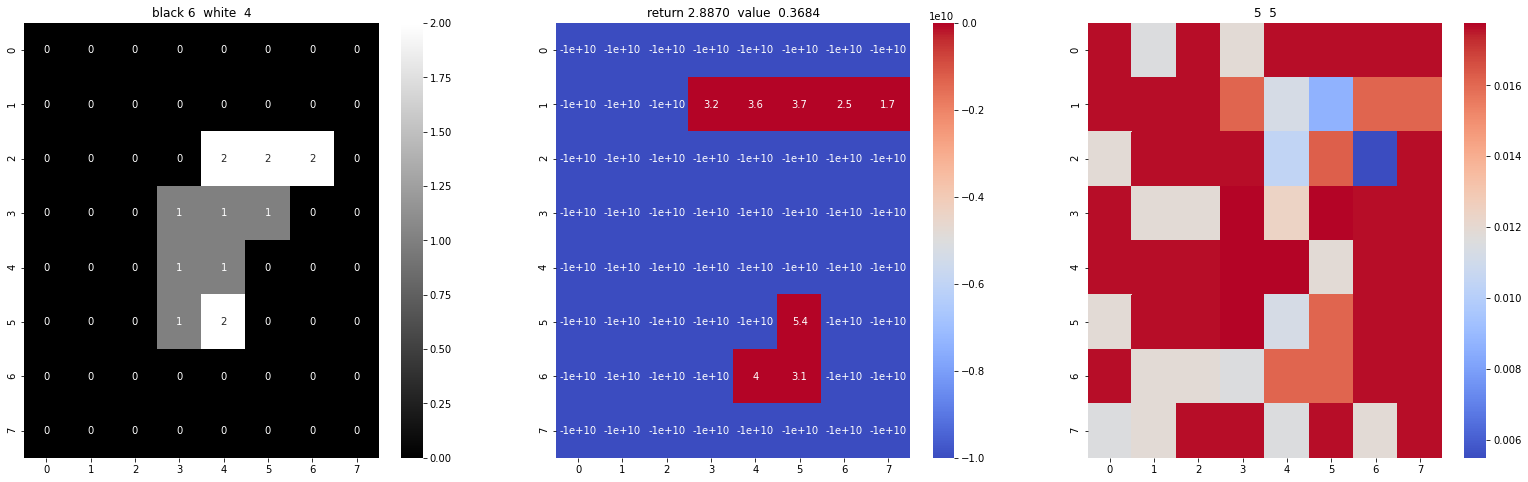

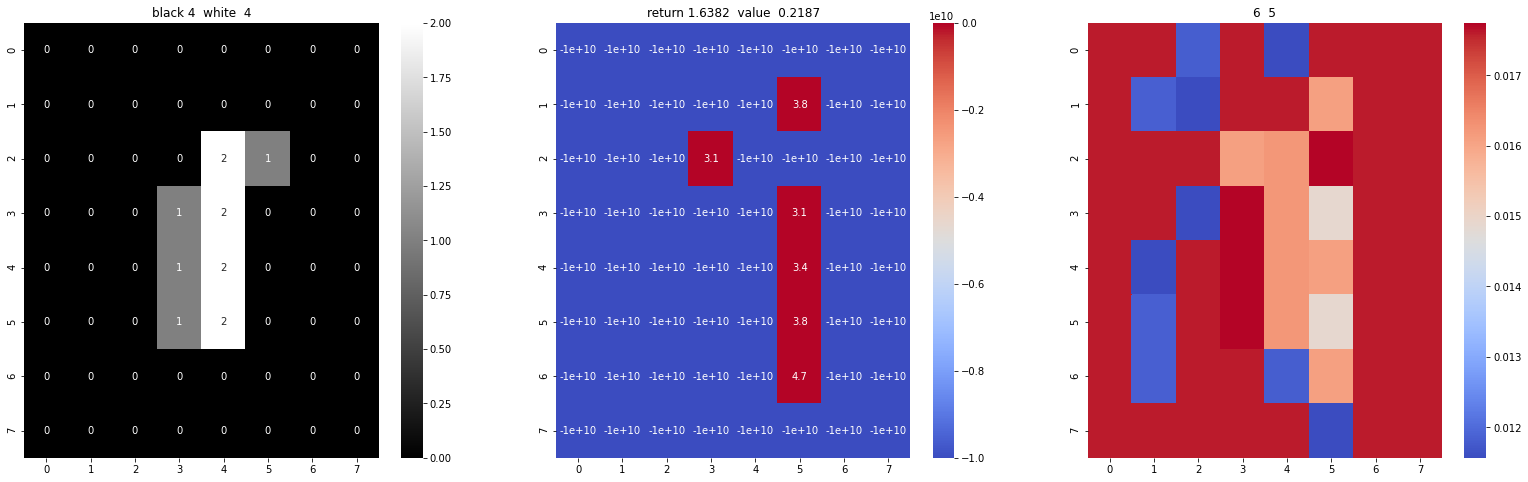

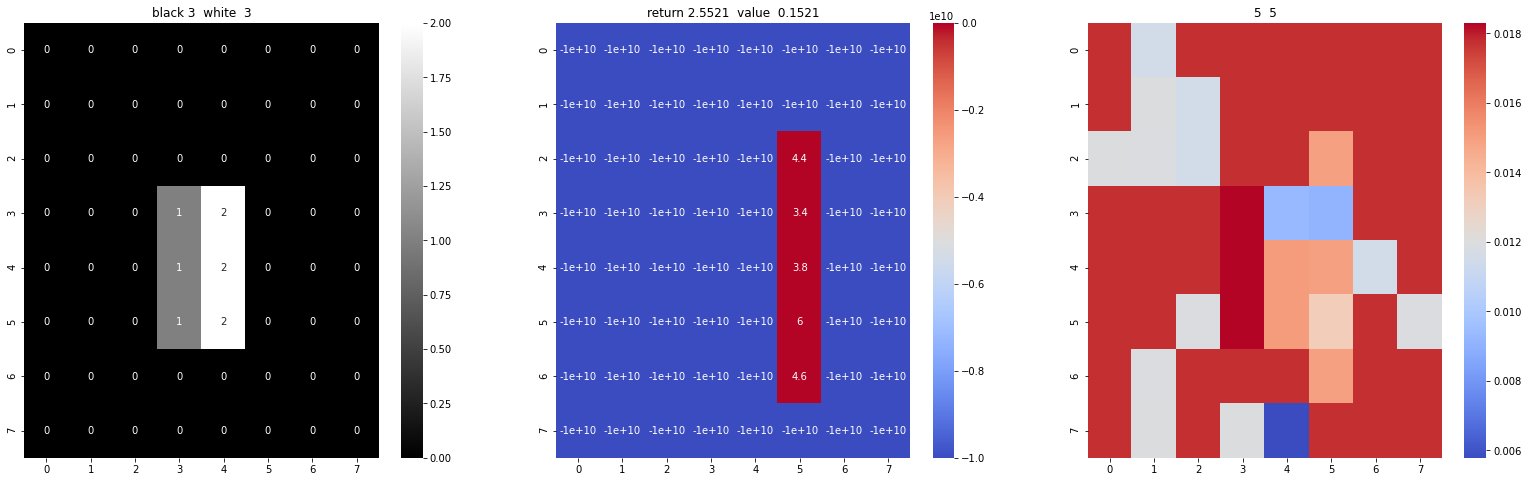

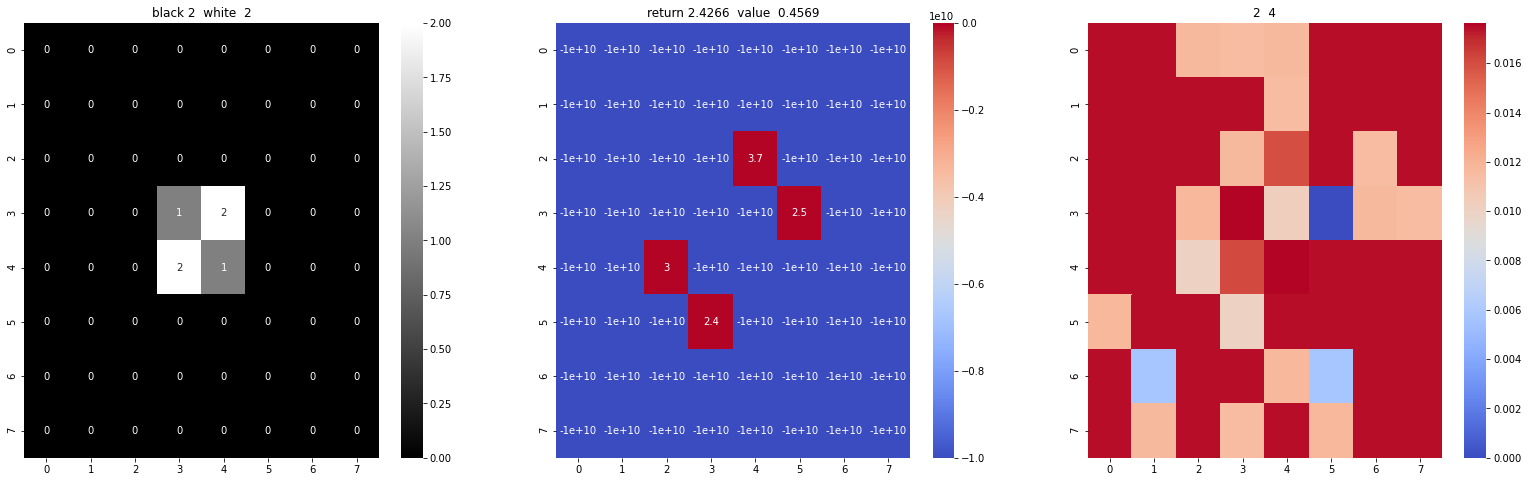

In [10]:
for state, p, v, r, attn  in zip(s, policy, values, returns, attention):
    v_1 = state[0]
    v_2 = state[1]
    board = (v_1+2*v_2).numpy()
    
    plt.figure(figsize=(27,8))
    
    plt.subplot(1,3,1)
    sns.heatmap(board, cmap='gray', annot=True)
    plt.title(f"black {len(v_1[v_1==1])}  white  {len(v_2[v_2==1])}")
    
    
    plt.subplot(1,3,2)    
    sns.heatmap(p.reshape(8,8), cmap='coolwarm', annot=True)
    plt.title(f"return {r:.4f}  value  {v:.4f}")
    
    plt.subplot(1,3,3)    
    action = p.argmax()
    p_attn = attn[action]
    sns.heatmap(p_attn.reshape(8,8), cmap='coolwarm')
    plt.title(f"{action//8}  {action%8}")
    plt.show()